In [1]:
# Import libraries
%run ./0_libraries.ipynb
%run ./1_constants.ipynb
%run ./2_functions.ipynb
%run ./3_testcases.ipynb
%run ./4_equations.ipynb

%run ./11_fem.ipynb
%run ./12_reference.ipynb
%run ./13_stiffness.ipynb


INFO: stratified smooth flow.
INFO: l = 1
INFO: horizontal pipe.


In [2]:
# Reference
print ("Equation system :", system, ", case :", case, ", configuration :", inclination)
print (" ")
print (" ======================================================================")
print (" ")

if any ([inclination == 'horizontal', inclination == 'upward_straight', inclination == "downward_straight"]):
    # Pipe reference conditions
    ref, Re_ref = ref_state (j_l, j_g, var4_0, beta, rho_l, p_factor, mu_l, mu_g, D)

    # Print reference conditions
    print ("INFO: var1_ref = ", ref[0], "[-]")
    print ("INFO: var2_ref = ", ref[1], "[m/s]")
    print ("INFO: var3_ref = ", ref[2], "[m/s]")
    print ("INFO: var4_ref = ", ref[3], "[Pa]")
    print (" ")
    print ("INFO: Rel_ref  = ", Re_ref[0], "[-]")
    print ("INFO: Reg_ref  = ", Re_ref[1], "[-]")
    print ("INFO: Regl_ref = ", Re_ref[2], "[-]")
    print (" ")

    # Linearized matrices
    Aeval, Beval, Ceval = linear_matrices_function (ref[0], ref[1], ref[2], ref[3], beta, D, system, rho_l, p_factor, mu_l, mu_g, dirichlet_type)

    # Define characteristics
    listreal1, listimag1, maxchar = characteristics_function (Aeval, Beval)

    # Print characteristics
    print ("Re [lambda] =", listreal1)
    print ("Im [lambda] =", listimag1)
    print (" ")
    print ("max (Re [lambda]) =", maxchar)
    print (" ")

    # Define well-posedness
    if all ([ cond1 == 0 for cond1 in listimag1 ]) :
        print ("INFO: well-posed")
        wp = "well-posed"
    else: 
        print ("INFO: ill-posed")
        wp = "ill-posed"

    print (" ")

    # Define stability
    listreal2, listimag2, _, vect2 = stability_function (Aeval, Beval, Ceval)

    # Print stability
    if wp == "well-posed":
        if all ([ cond2 > 0 for cond2 in listimag2]) :
            print ("Re [omega] =", listreal2)
            print ("Im [omega] =", listimag2)
            print (" ")
            print ("INFO: VKH stable")
        else:
            print ("Re [omega] =", listreal2)
            print ("Im [omega] =", listimag2)
            print (" ")
            print ("INFO: VKH unstable")
            print (" ")
            local = np.where (np.asarray (listimag2) < 0)
            eigenvector = vect2 [local]
            print ("r =", eigenvector)
    else:
        pass
# ==========================================================================================
elif inclination == "vsection":
    # SECTION 1
    # Pipe reference conditions
    ref = ref_state (j_l, j_g, var4_0, beta_1, rho_l, p_factor, mu_l, mu_g, D)
    
    # Print reference conditions
    print ("SECTION 1")
    print (" ")
    print ("INFO: var1_ref = ", ref[0], "[-]")
    print ("INFO: var2_ref = ", ref[1], "[m/s]")
    print ("INFO: var3_ref = ", ref[2], "[m/s]")
    print ("INFO: var4_ref = ", ref[3], "[Pa]")
    print (" ")
    # print ("INFO: Rel_ref  = ", Re_ref[0], "[-]")
    # print ("INFO: Reg_ref  = ", Re_ref[1], "[-]")
    # print ("INFO: Regl_ref = ", Re_ref[2], "[-]")
    # print (" ")

    # Linearized matrices
    Aeval_1, Beval_1, Ceval_1 = linear_matrices_function (ref[0], ref[1], ref[2], ref[3], beta_1, D, system, rho_l, p_factor, mu_l, mu_g, dirichlet_type)

    # Characteristics
    listreal1_1, listimag1_1, maxchar_1 = characteristics_function (Aeval_1, Beval_1)

    # Print characteristics
    print ("Re [lambda] =", listreal1_1)
    print ("Im [lambda] =", listimag1_1)
    print (" ")
    print ("max (Re [lambda]) =", maxchar_1)
    print (" ")

    # Define well-posedness
    if all ([ cond3 == 0 for cond3 in listimag1_1 ]) :
        print ("INFO: well-posed")
        wp_1 = "well-posed"
    else: 
        print ("INFO: ill-posed")
        wp_1 = "ill-posed"

    print (" ")

    # Stability
    listreal2_1, listimag2_1, _, vect2_1  = stability_function (Aeval_1, Beval_1, Ceval_1)

    # print stability
    if wp_1 == "well-posed":
        if all ([ cond4 > 0 for cond4 in listimag2_1]) :
            print ("Re [omega] =", listreal2_1)
            print ("Im [omega] =", listimag2_1)
            print (" ")
            print ("INFO: VKH stable")
        else:
            print ("Re [omega] =", listreal2_1)
            print ("Im [omega] =", listimag2_1)
            print (" ")
            print ("INFO: VKH unstable")
            print (" ")
            local_1 = np.where (np.asarray (listimag2_1) < 0)
            eigenvector_1 = vect2_1 [local_1]
            print ("r =", eigenvector_1)
    else:
        pass
    
    # Define alpha for section 2
    alpha_section1 = ref[0]

    # SECTION 2
    # Pipe reference conditions
    # ref = ref_state (u1_section1*ref[0]*alpha_section1, u2_section1*(1 - alpha_section1), var4_0, beta_2, rho_l, p_factor, mu_l, mu_g, D)
    del (ref, j_l)
    ref = ref_state_jl (alpha_section1, j_g, var4_0, beta_2, rho_l, p_factor, mu_l, mu_g, D)

    # Print reference conditions
    print (" ")
    print (" ======================================================================")
    print (" ")
    print ("SECTION 2")
    print (" ")
    print ("INFO: var1_ref = ", ref[0], "[-]")
    print ("INFO: var2_ref = ", ref[1], "[m/s]")
    print ("INFO: var3_ref = ", ref[2], "[m/s]")
    print ("INFO: var4_ref = ", ref[3], "[Pa]")
    print (" ")
    # print ("INFO: Rel_ref  = ", Re_ref[0], "[-]")
    # print ("INFO: Reg_ref  = ", Re_ref[1], "[-]")
    # print ("INFO: Regl_ref = ", Re_ref[2], "[-]")
    # print (" ")

    # Linearized matrices
    Aeval_2, Beval_2, Ceval_2 = linear_matrices_function (ref[0], ref[1], ref[2], ref[3], beta_2, D, system, rho_l, p_factor, mu_l, mu_g, dirichlet_type)

    # Characteristics
    listreal1_2, listimag1_2, maxchar_2 = characteristics_function (Aeval_2, Beval_2)

    # Print characteristics
    print ("Re [lambda] =", listreal1_2)
    print ("Im [lambda] =", listimag1_2)
    print (" ")
    print ("max (Re [lambda]) =", maxchar_2)
    print (" ")

    # Define well-posedness
    if all ([ cond5 == 0 for cond5 in listimag1_2 ]) :
        print ("INFO: well-posed")
        wp_2 = "well-posed"
    else: 
        print ("INFO: ill-posed")
        wp_2 = "ill-posed"

    print (" ")

    # Stability
    listreal2_2, listimag2_2, _, vect2_2 = stability_function (Aeval_2, Beval_2, Ceval_2)

    if wp_2 == "well-posed":
        if all ([ cond6 > 0 for cond6 in listimag2_2]) :
            print ("Re [omega] =", listreal2_2)
            print ("Im [omega] =", listimag2_2)
            print (" ")
            print ("INFO: VKH stable")
        else:
            print ("Re [omega] =", listreal2_2)
            print ("Im [omega] =", listimag2_2)
            print (" ")
            print ("INFO: VKH unstable")
            print (" ")
            local_2 = np.where (np.asarray (listimag2_2) < 0)
            eigenvector_2 = vect2_2 [local_2]
            print ("r =", eigenvector_2)
    else:
        pass
    
    print (" ")
    print (" ======================================================================")
    print (" ")
    print ("max (Re [lambda]) =", max (maxchar_1, maxchar_2))

# Define reference for system 3
if system == "system_3":
    ref1__ = ref[0]*rho_l
    ref2__ = (1 - ref[0])*(p_factor*ref[3] + DOLFIN_EPS)
    ref3__ = ref1__*ref[1]
    ref4__ = (1 - ref[0])*(p_factor*ref[3] + DOLFIN_EPS)*ref[2]

    # Define reference vector
    ref = np.array ([ref1__, ref2__, ref3__, ref4__])

    print (" ")
    print ("INFO: cvar1_ref = ", ref[0])
    print ("INFO: cvar2_ref = ", ref[1])
    print ("INFO: cvar3_ref = ", ref[2])
    print ("INFO: cvar4_ref = ", ref[3])

else:
    pass


Equation system : system_1 , case : case2 , configuration : horizontal
 
 
INFO: var1_ref =  0.5025362575435492 [-]
INFO: var2_ref =  0.9949530854630335 [m/s]
INFO: var3_ref =  13.886439172207096 [m/s]
INFO: var4_ref =  100000.0 [Pa]
 
INFO: Rel_ref  =  87418.81002345469 [-]
INFO: Reg_ref  =  42552.222997493176 [-]
INFO: Regl_ref =  39503.387724487926 [-]
 
Re [lambda] = [307.47435704297544, -279.73181031042583, 0.6843971556567113, 1.3358406271547245]
Im [lambda] = [0.0, 0.0, 0.0, 0.0]
 
max (Re [lambda]) = 307.47435704297544
 
INFO: well-posed
 
Re [omega] = [1931.9123044367486, -1757.6007356463165, 4.276532328609236, 8.416989248646983]
Im [omega] = [4.804727478902111, 4.598824585586432, 0.45463141559041365, -0.21388033508091056]
 
INFO: VKH unstable
 
r = [[ 0.98499139-0.17257859j -0.99880428-0.04879975j  0.9888276 +0.13433228j
  -0.92892534-0.36397854j]]


In [4]:
print(Aeval)

[[ 1.00000000e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.16142447e+00  0.00000000e+00  0.00000000e+00  5.77766565e-06]
 [ 9.94953085e+02  5.02536258e+02  0.00000000e+00  0.00000000e+00]
 [-1.61280503e+01  0.00000000e+00  5.77766565e-01  8.02312025e-05]]


In [5]:
if system == "system_3":
    Aeval, Beval, Ceval = linear_matrices_function_conserved (ref[0], ref[1], ref[2], ref[3], beta, D, system, rho_l, p_factor, mu_l, mu_g, dirichlet_type)
else:
    pass

In [7]:
# ===============================================================
# VARIABLES: numerical solution
# ===============================================================
# variable1: liquid volume fraction (alpha_l)
# variable2: liquid velocity (u_l)
# variable3: gas velocity (u_g)
# variable4: interfacial pressure (p_i)

# ===============================================================
# FINITE ELEMENT SPACES
# ===============================================================

# Define mesh
deltax = l/nxvector[0]
l_fenics = Constant (l)
mesh = IntervalMesh (nxvector[0], 0, l_fenics)
coordinates = mesh.coordinates ()
mesh_cells = mesh.cells () # print (mesh_cells)

if elementspace == "IPDG":  
    # Mesh-related functions
    n = FacetNormal (mesh)
    h = CellDiameter (mesh)
    h_avg = (h ("+") + h ("-"))/2

    # Initialize mesh function for boundary domains
    boundaries = MeshFunction ("size_t", mesh, mesh.topology ().dim () - 1, 0)

    # boundaries = MeshFunction ("size_t", mesh)
    boundaries.set_all (0)
    inflow.mark (boundaries, 1)
    outflow.mark (boundaries, 2)

    # Save sub domains to file
    file = File ("tfm/boundaries.xml")
    file << boundaries
else:
    pass

<Figure size 576x288 with 0 Axes>

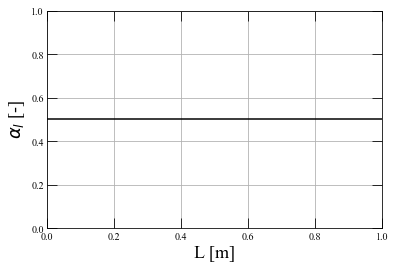

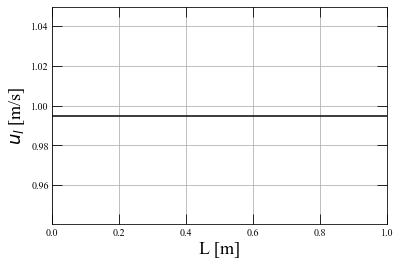

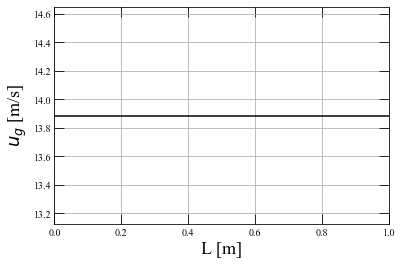

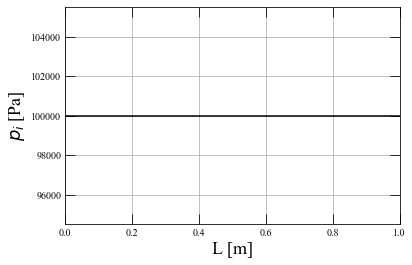

In [8]:
# Define element spaces 
# https://fenicsproject.org/docs/dolfin/1.5.0/python/programmers-reference/functions/functionspace/FunctionSpace.html#dolfin.functions.functionspace.FunctionSpace
if elementspace == "CG_elements":
    # Element spaces
    e1 = "Lagrange" 
    e2 = "Lagrange"
    e3 = "Lagrange"
    e4 = "Lagrange"
    # Degree of basis functions
    deg1 = p
    deg2 = p
    deg3 = p
    deg4 = p
elif elementspace == "TaylorHood":
    # Element spaces
    e1 = "Lagrange" 
    e2 = "Lagrange"
    e3 = "Lagrange"
    e4 = "Lagrange"
    # Degree of basis functions
    deg1 = p - 1
    deg2 = p
    deg3 = p
    deg4 = p - 1
elif elementspace == "Mini":
    # Element spaces
    e1 = "Lagrange" 
    e2 = "Lagrange"
    e3 = "Lagrange"
    e4 = "Lagrange"
    e2_b = "Bubble"
    e3_b = "Bubble"
    # Degree of basis functions
    deg1 = 1 
    deg2 = 1
    deg3 = 1
    deg4 = 1
    deg2_b = mesh.topology ().dim () + 1
    deg3_b = mesh.topology ().dim () + 1
elif elementspace == "IPDG":
    # Element spaces
    e1 = "DG"
    e2 = "DG"
    e3 = "DG"
    e4 = "DG"
    # Degree of basis functions
    deg1 = p
    deg2 = p
    deg3 = p
    deg4 = p
    # Penalty terms
    alpha1 = Constant (4.0)
    alpha2 = Constant (4.0)
    alpha3 = Constant (4.0)
    alpha4 = Constant (4.0)

    gamma1 = Constant (8.0)
    gamma2 = Constant (8.0)
    gamma3 = Constant (8.0)
    gamma4 = Constant (8.0)

# Define elements and mixed elements
if any ([elementspace == "CG_elements", elementspace == "TaylorHood", elementspace == "IPDG"]):
    # Define function space
    # Continuous elements
    element1 = FiniteElement (e1, mesh.ufl_cell (), degree = deg1)
    element2 = FiniteElement (e2, mesh.ufl_cell (), degree = deg2)
    element3 = FiniteElement (e3, mesh.ufl_cell (), degree = deg3)
    element4 = FiniteElement (e4, mesh.ufl_cell (), degree = deg4)
    # Mixed element
    element = MixedElement ([element1, element2, element3, element4])
elif elementspace == "Mini":
    # Define function space
    # Continuous elements
    element1 = FiniteElement (e1, mesh.ufl_cell (), degree = deg1)
    element2 = FiniteElement (e2, mesh.ufl_cell (), degree = deg2)
    element3 = FiniteElement (e3, mesh.ufl_cell (), degree = deg3)
    element4 = FiniteElement (e4, mesh.ufl_cell (), degree = deg4)
    # Bubble elements
    element2_b = FiniteElement (e2_b, mesh.ufl_cell (), degree = deg2_b)
    element3_b = FiniteElement (e3_b, mesh.ufl_cell (), degree = deg3_b)
    # Mixed element
    element = MixedElement ([element1, NodalEnrichedElement (element2, element2_b), NodalEnrichedElement (element3, element3_b), element4])

# Define function space
if dirichlet_type == "nonperiodic":
    V = FunctionSpace (mesh, element)
elif dirichlet_type == "periodic":
    pbc = PeriodicBoundary ()
    V = FunctionSpace (mesh, element, constrained_domain = pbc)    
    #boundaries
    # https://fenicsproject.discourse.group/t/dg-for-advection-equation-with-periodic-boundary-condition/272

# Define variational problem
dvariable = TrialFunction (V)
v1, v2, v3, v4 = TestFunctions (V)

# Define functions
variable = Function (V) # solution from (n+1) current step
variable_n = Function (V) # solution from (n) previous converged step
variable_n2 = Function (V) # solution from (n) previous converged step
variable_past = Function (V) # solution from (n-1) previous converged step
variable_ic = Function (V) # reference solution from initial conditions

# Split mixed functions
dvariable1, dvariable2, dvariable3, dvariable4 = split (dvariable)
variable1, variable2, variable3, variable4 = split (variable)
variable1_n, variable2_n, variable3_n, variable4_n = split (variable_n)
variable1_n2, variable2_n2, variable3_n2, variable4_n2 = split (variable_n2)
variable1_past, variable2_past, variable3_past, variable4_past = split (variable_past)
variable1_ic, variable2_ic, variable3_ic, variable4_ic = split (variable_ic)

# Define Dirichlet boundary conditions
if any ([system == "system_1", system == "system_2"]):
    if IBVP == "SS":
        # Define Dirichlet boundary conditions for smooth flow
        variable1_dirichlet = Constant (ref[0])
        variable2_dirichlet = Constant (ref[1])
        variable3_dirichlet = Constant (ref[2])
        variable4_dirichlet = Constant (ref[3])
    elif IBVP == "SS_perturbed":
        # Define Dirichlet boundary conditions for perturbed flow
        timedirichlet = 0
        amplitude1 = (eigenvector[0]).real
        amplitude2 = (eigenvector[1]).real
        amplitude3 = (eigenvector[2]).real
        amplitude4 = (eigenvector[3]).real
        variable1_dirichlet = Expression ('variable1_ref + amplitude1*sin (ang_frequency*timedirichlet - wavenumber*x[0])', degree = p - 1, variable1_ref = variable1_ref, amplitude1 = amplitude1, wavenumber  = wavenumber, ang_frequency = ang_frequency, timedirichlet = timedirichlet, domain = mesh)
        variable2_dirichlet = Expression ('variable2_ref + amplitude2*sin (ang_frequency*timedirichlet -wavenumber*x[0])', degree = p, variable2_ref = variable2_ref, amplitude2 = amplitude2, wavenumber  = wavenumber, ang_frequency = ang_frequency, timedirichlet = timedirichlet, domain = mesh)
        variable3_dirichlet = Expression ('variable3_ref + amplitude3*sin (ang_frequency*timedirichlet -wavenumber*x[0])', degree = p, variable3_ref = variable3_ref, amplitude3 = amplitude3, wavenumber  = wavenumber, ang_frequency = ang_frequency, timedirichlet = timedirichlet, domain = mesh)
        variable4_dirichlet = Expression ('variable4_ref + amplitude4*sin (ang_frequency*timedirichlet - wavenumber*x[0])', degree = p - 1, variable4_ref = variable4_ref, amplitude4 = amplitude4, wavenumber  = wavenumber, ang_frequency = ang_frequency, timedirichlet = timedirichlet, domain = mesh)
elif system == "system_3":
    if IBVP == "SS":
        # Define Dirichlet boundary conditions for smooth flow
        variable1_dirichlet = Constant (ref[0]/rho_l)
        variable2_dirichlet = Constant (ref[2]/ref[0])
        variable3_dirichlet = Constant (ref[3]/ref[1])
        variable4_dirichlet = Constant (ref[1]/((1 - ref[0]/rho_l)*p_factor))

# Define vector of boundary conditions
if elementspace == "IPDG":
    # Define ds for facets
    # DOLFIN predefines the “measures” dx, ds and dS representing integration over cells, exterior facets (that is, facets on the boundary) and interior facets, respectively. These measures can take an additional integer argument. In fact, dx defaults to dx(0), ds defaults to ds(0), and dS defaults to dS(0). Integration over subregions can be specified by measures with different integer labels as arguments.
    # Define outer surface measure aware of Dirichlet boundaries
    ds = Measure ('ds', domain = mesh, subdomain_data = boundaries)
    # Dirichlet boundary conditions
    bc1 = DirichletBC (V.sub (0), variable1_dirichlet, boundaries, 1)#, "geometric") # "geometric"<<<<
    bc2 = DirichletBC (V.sub (1), variable2_dirichlet, boundaries, 1)#, "geometric")
    bc3 = DirichletBC (V.sub (2), variable3_dirichlet, boundaries, 1)#, "geometric")
    bc4 = DirichletBC (V.sub (3), variable4_dirichlet, boundaries, 2)#, "geometric")
    bcs = [bc1, bc2, bc3, bc4]
else:
    # Dirichlet boundary conditions
    bc1 = DirichletBC (V.sub (0), variable1_dirichlet, Inflow)#, "geometric") # "geometric" "pointwise"
    bc2 = DirichletBC (V.sub (1), variable2_dirichlet, Inflow)#, "geometric")
    bc3 = DirichletBC (V.sub (2), variable3_dirichlet, Inflow)#, "geometric")
    bc4 = DirichletBC (V.sub (3), variable4_dirichlet, Outflow)#, "geometric")
    bcs = [bc1, bc2, bc3, bc4]

# Initial conditions
if IBVP == 'SS':
    variable_init = InitialConditions_SS ()
elif IBVP == 'SS_perturbed':
    variable_init = InitialConditions_SS_perturbed ()

# interpolate vector of initial conditions
variable_ic.interpolate (variable_init)

# interpolate vector of initial conditions (transient simulations)
if time_method == 'BDF1':
    variable_n.interpolate (variable_init)
elif time_method == 'CN':
    variable_n.interpolate (variable_init)
elif time_method == 'BDF2':
    variable_past.interpolate (variable_init)

# Plot initial conditions
if any ([system == "system_1", system == "system_2"]):
    plt.figure (1, figsize = (8, 4))
    fig, ax = plt.subplots ()
    plt.ylim (0, 1)
    plt.xlim (0, l)
    plt.grid (True, which = "both")
    ax.set_xlabel (r'L [m]', fontsize = 18)
    ax.set_ylabel (r'$\alpha_l$ [-]', fontsize = 18)
    ax.xaxis.set_tick_params (which = 'major', size = 10, direction = 'in', top = 'on')
    ax.xaxis.set_tick_params (which = 'minor', size = 7, direction = 'in', top = 'on')
    ax.yaxis.set_tick_params (which = 'major', size = 10, direction = 'in', right = 'on')
    ax.yaxis.set_tick_params (which = 'minor', size = 7, direction = 'in', right = 'on')
    plot (variable1_ic, color = 'k')

    plt.figure (2, figsize = (8, 4))
    fig, ax = plt.subplots ()
    plt.xlim (0, l)
    plt.grid (True, which = "both")
    ax.set_xlabel (r'L [m]', fontsize = 18)
    ax.set_ylabel (r'$u_l$ [m/s]', fontsize = 18)
    ax.xaxis.set_tick_params (which = 'major', size = 10, direction = 'in', top = 'on')
    ax.xaxis.set_tick_params (which = 'minor', size = 7, direction = 'in', top = 'on')
    ax.yaxis.set_tick_params (which = 'major', size = 10, direction = 'in', right = 'on')
    ax.yaxis.set_tick_params (which = 'minor', size = 7, direction = 'in', right = 'on')
    plot (variable2_ic, color = 'k')

    plt.figure (3, figsize = (8, 4))
    fig, ax = plt.subplots ()
    plt.xlim (0, l)
    plt.grid (True, which = "both")
    ax.set_xlabel (r'L [m]', fontsize = 18)
    ax.set_ylabel (r'$u_g$ [m/s]', fontsize = 18)
    ax.xaxis.set_tick_params (which = 'major', size = 10, direction = 'in', top = 'on')
    ax.xaxis.set_tick_params (which = 'minor', size = 7, direction = 'in', top = 'on')
    ax.yaxis.set_tick_params (which = 'major', size = 10, direction = 'in', right = 'on')
    ax.yaxis.set_tick_params (which = 'minor', size = 7, direction = 'in', right = 'on')
    plot (variable3_ic, color = 'k')

    plt.figure (4, figsize = (8, 4))
    fig, ax = plt.subplots ()
    plt.xlim (0, l)
    plt.grid (True, which = "both")
    ax.set_xlabel (r'L [m]', fontsize = 18)
    ax.set_ylabel (r'$p_i$ [Pa]', fontsize = 18)
    ax.xaxis.set_tick_params (which = 'major', size = 10, direction = 'in', top = 'on')
    ax.xaxis.set_tick_params (which = 'minor', size = 7, direction = 'in', top = 'on')
    ax.yaxis.set_tick_params (which = 'major', size = 10, direction = 'in', right = 'on')
    ax.yaxis.set_tick_params (which = 'minor', size = 7, direction = 'in', right = 'on')
    plot (variable4_ic, color = 'k')
else:
    pass

# ===============================================================
# TRANSIENT SIMULATIONS
# ===============================================================
if discretization == "fully_discretized":
    # Define time discretization properties
    if base_CFL == "liquid":
        u_CFL = ref[1]
    elif base_CFL == "gas":
        u_CFL = ref[2]
    elif base_CFL == "max_velocity":
        u_CFL = max (ref[1], ref[2])
    elif base_CFL == "max_characteristic":
        u_CFL = maxchar

    # Time step
    if timestep == "timestep_input":
        dt = dt_input
    elif timestep == "cfl_based":
        if time_method == "BDF1":
            dt = CFL*deltax/(u_CFL)
        elif time_method == "CN":
            dt = CFL*deltax/(u_CFL)  # Van Zwieten & Smith /lambda_max Holmas (maximum modulus of the eigenvalues of the Jacobian of (4.1) at time 
        elif time_method == "BDF2":
            dt = CFL*deltax/(u_CFL)/2

    if T_simulation == "T_input":     # OPTIONS: T_cfl_based, T_input
        T = T_in
        num_steps = round (T/dt)
    elif T_simulation == "T_cfl_based":
        T = num_steps*dt

    print ("INFO: T     = ", T)
    print ("INFO: dt    = ", dt)
    print ("INFO: steps = ", num_steps)


In [8]:
# ===============================================================
# LINEAR STABILITY - VARIATIONAL FORM
# ===============================================================
if simulation == 'linear_stability':
        # Amat coefficient
        A11_ref = Constant (Aeval[0][0])
        A12_ref = Constant (Aeval[0][1])
        A13_ref = Constant (Aeval[0][2])
        A14_ref = Constant (Aeval[0][3])

        A21_ref = Constant (Aeval[1][0])
        A22_ref = Constant (Aeval[1][1])
        A23_ref = Constant (Aeval[1][2])
        A24_ref = Constant (Aeval[1][3])

        A31_ref = Constant (Aeval[2][0])
        A32_ref = Constant (Aeval[2][1])
        A33_ref = Constant (Aeval[2][2])
        A34_ref = Constant (Aeval[2][3])

        A41_ref = Constant (Aeval[3][0])
        A42_ref = Constant (Aeval[3][1])
        A43_ref = Constant (Aeval[3][2])
        A44_ref = Constant (Aeval[3][3])

        # Bmat coefficient
        B11_ref = Constant (Beval[0][0])
        B12_ref = Constant (Beval[0][1])
        B13_ref = Constant (Beval[0][2])
        B14_ref = Constant (Beval[0][3])

        B21_ref = Constant (Beval[1][0])
        B22_ref = Constant (Beval[1][1])
        B23_ref = Constant (Beval[1][2])
        B24_ref = Constant (Beval[1][3])

        B31_ref = Constant (Beval[2][0])
        B32_ref = Constant (Beval[2][1])
        B33_ref = Constant (Beval[2][2])
        B34_ref = Constant (Beval[2][3])

        B41_ref = Constant (Beval[3][0])
        B42_ref = Constant (Beval[3][1])
        B43_ref = Constant (Beval[3][2])
        B44_ref = Constant (Beval[3][3])

        # Bmat
        Bm1 = ( inner (B11_ref*Dx (variable1, 0), v1) \
                + inner (B12_ref*Dx (variable2, 0), v1) \
                + inner (B13_ref*Dx (variable3, 0), v1) \
                + inner (B14_ref*Dx (variable4, 0), v1) )*dx 

        Bm2 = ( inner (B21_ref*Dx (variable1, 0), v2) \
                + inner (B22_ref*Dx (variable2, 0), v2) \
                + inner (B23_ref*Dx (variable3, 0), v2) \
                + inner (B24_ref*Dx (variable4, 0), v2) )*dx 

        Bm3 = ( inner (B31_ref*Dx (variable1, 0), v3) \
                + inner (B32_ref*Dx (variable2, 0), v3) \
                + inner (B33_ref*Dx (variable3, 0), v3) \
                + inner (B34_ref*Dx (variable4, 0), v3) )*dx 

        Bm4 = ( inner (B41_ref*Dx (variable1, 0), v4) \
                + inner (B42_ref*Dx (variable2, 0), v4) \
                + inner (B43_ref*Dx (variable3, 0), v4) \
                + inner (B44_ref*Dx (variable4, 0), v4) )*dx

        Bm = Bm1 + Bm2 + Bm3 + Bm4

        # Cmat coefficient
        C11_ref = Constant (Ceval[0][0])
        C12_ref = Constant (Ceval[0][1])
        C13_ref = Constant (Ceval[0][2])
        C14_ref = Constant (Ceval[0][3])

        C21_ref = Constant (Ceval[1][0])
        C22_ref = Constant (Ceval[1][1])
        C23_ref = Constant (Ceval[1][2])
        C24_ref = Constant (Ceval[1][3])

        C31_ref = Constant (Ceval[2][0])
        C32_ref = Constant (Ceval[2][1])
        C33_ref = Constant (Ceval[2][2])
        C34_ref = Constant (Ceval[2][3])

        C41_ref = Constant (Ceval[3][0])
        C42_ref = Constant (Ceval[3][1])
        C43_ref = Constant (Ceval[3][2])
        C44_ref = Constant (Ceval[3][3])

        # Cmat_lin
        # def C11 (variable1, variable2, variable3, variable4):
        #         return C11_ref*variable1
        # def C12 (variable1, variable2, variable3, variable4):
        #         return C12_ref*variable2
        # def C13 (variable1, variable2, variable3, variable4):
        #         return C13_ref*variable3
        # def C14 (variable1, variable2, variable3, variable4):
        #         return C14_ref*variable4

        # def C21 (variable1, variable2, variable3, variable4):
        #         return C21_ref*variable1
        # def C22 (variable1, variable2, variable3, variable4):
        #         return C22_ref*variable2
        # def C23 (variable1, variable2, variable3, variable4):
        #         return C23_ref*variable3
        # def C24 (variable1, variable2, variable3, variable4):
        #         return C24_ref*variable4

        # def C31 (variable1, variable2, variable3, variable4):
        #         return C31_ref*variable1
        # def C32 (variable1, variable2, variable3, variable4):
        #         return C32_ref*variable2
        # def C33 (variable1, variable2, variable3, variable4):
        #         return C33_ref*variable3
        # def C34 (variable1, variable2, variable3, variable4):
        #         return C34_ref*variable4

        # def C41 (variable1, variable2, variable3, variable4):
        #         return C41_ref*variable1
        # def C42 (variable1, variable2, variable3, variable4):
        #         return C42_ref*variable2
        # def C43 (variable1, variable2, variable3, variable4):
        #         return C43_ref*variable3
        # def C44 (variable1, variable2, variable3, variable4):
        #         return C44_ref*variable4
        # Cmat_lin
        Cm1_lin = ( inner (C11_ref*variable1, v1) \
        + inner (C12_ref*variable2, v1) \
        + inner (C13_ref*variable3, v1) \
        + inner (C14_ref*variable4, v1) )*dx

        Cm2_lin = ( inner (C21_ref*variable1, v2) \
        + inner (C22_ref*variable2, v2) \
        + inner (C23_ref*variable3, v2) \
        + inner (C24_ref*variable4, v2) )*dx

        Cm3_lin = ( inner (C31_ref*variable1,v3) \
        + inner (C32_ref*variable2,v3) \
        + inner (C33_ref*variable3,v3) \
        + inner (C34_ref*variable4,v3) )*dx

        Cm4_lin = ( inner (C41_ref*variable1, v4) \
        + inner (C42_ref*variable2, v4) \
        + inner (C43_ref*variable3, v4) \
        + inner (C44_ref*variable4, v4) )*dx

        Cm = Cm1_lin + Cm2_lin + Cm3_lin + Cm4_lin

        if discretization == "fully_discretized":
                # if any ([time_method == 'BDF1', time_method == 'CN']):
                # Bmat_n
                Bm1_n = ( inner (B11_ref*Dx (variable1_n, 0), v1) \
                        + inner (B12_ref*Dx (variable2_n, 0), v1) \
                        + inner (B13_ref*Dx (variable3_n, 0), v1) \
                        + inner (B14_ref*Dx (variable4_n, 0), v1) )*dx 

                Bm2_n = ( inner (B21_ref*Dx (variable1_n, 0), v2) \
                        + inner (B22_ref*Dx (variable2_n, 0), v2) \
                        + inner (B23_ref*Dx (variable3_n, 0), v2) \
                        + inner (B24_ref*Dx (variable4_n, 0), v2) )*dx 

                Bm3_n = ( inner (B31_ref*Dx (variable1_n, 0), v3) \
                        + inner (B32_ref*Dx (variable2_n, 0), v3) \
                        + inner (B33_ref*Dx (variable3_n, 0), v3) \
                        + inner (B34_ref*Dx (variable4_n, 0), v3) )*dx 

                Bm4_n = ( inner (B41_ref*Dx (variable1_n, 0), v4) \
                        + inner (B42_ref*Dx (variable2_n, 0), v4) \
                        + inner (B43_ref*Dx (variable3_n, 0), v4) \
                        + inner (B44_ref*Dx (variable4_n, 0), v4) )*dx

                Bm_n = Bm1_n + Bm2_n + Bm3_n + Bm4_n

                # Cmat_lin_n
                Cm1_lin_n = ( inner (C11_ref*variable1_n, v1) \
                + inner (C12_ref*variable2_n, v1) \
                + inner (C13_ref*variable3_n, v1) \
                + inner (C14_ref*variable4_n, v1) )*dx

                Cm2_lin_n = ( inner (C21_ref*variable1_n, v2) \
                + inner (C22_ref*variable2_n, v2) \
                + inner (C23_ref*variable3_n, v2) \
                + inner (C24_ref*variable4_n, v2) )*dx

                Cm3_lin_n = ( inner (C31_ref*variable1_n, v3) \
                + inner (C32_ref*variable2_n, v3) \
                + inner (C33_ref*variable3_n, v3) \
                + inner (C34_ref*variable4_n, v3) )*dx

                Cm4_lin_n = ( inner (C41_ref*variable1_n, v4) \
                + inner (C42_ref*variable2_n, v4) \
                + inner (C43_ref*variable3_n, v4) \
                + inner (C44_ref*variable4_n, v4) )*dx

                Cm_n = Cm1_lin_n + Cm2_lin_n + Cm3_lin_n + Cm4_lin_n

                if time_method == 'BDF2':
                        # Bmat_past
                        Bm1_past = ( inner (B11_ref*Dx (variable1_past, 0), v1) \
                                + inner (B12_ref*Dx (variable2_past, 0), v1) \
                                + inner (B13_ref*Dx (variable3_past, 0), v1) \
                                + inner (B14_ref*Dx (variable4_past, 0), v1) )*dx 

                        Bm2_past = ( inner (B21_ref*Dx (variable1_past, 0), v2) \
                                + inner (B22_ref*Dx (variable2_past, 0), v2) \
                                + inner (B23_ref*Dx (variable3_past, 0), v2) \
                                + inner (B24_ref*Dx (variable4_past, 0), v2) )*dx 

                        Bm3_past = ( inner (B31_ref*Dx (variable1_past, 0), v3) \
                                + inner (B32_ref*Dx (variable2_past, 0), v3) \
                                + inner (B33_ref*Dx (variable3_past, 0), v3) \
                                + inner (B34_ref*Dx (variable4_past, 0), v3) )*dx 

                        Bm4_past = ( inner (B41_ref*Dx (variable1_past, 0), v4) \
                                + inner (B42_ref*Dx (variable2_past, 0), v4) \
                                + inner (B43_ref*Dx (variable3_past, 0), v4) \
                                + inner (B44_ref*Dx (variable4_past, 0), v4) )*dx
                        
                        Bm_past = Bm1_past + Bm2_past + Bm3_past + Bm4_past

                        # Cmat_lin_past
                        Cm1_lin_past = ( inner (C11_ref*variable1_past, v1) \
                        + inner (C12_ref*variable2_past, v1) \
                        + inner (C13_ref*variable3_past, v1) \
                        + inner (C14_ref*variable4_past, v1) )*dx

                        Cm2_lin_past = ( inner (C21_ref*variable1_past, v2) \
                        + inner (C22_ref*variable2_past, v2) \
                        + inner (C23_ref*variable3_past, v2) \
                        + inner (C24_ref*variable4_past, v2) )*dx

                        Cm3_lin_past = ( inner (C31_ref*variable1_past, v3) \
                        + inner (C32_ref*variable2_past, v3) \
                        + inner (C33_ref*variable3_past, v3) \
                        + inner (C34_ref*variable4_past, v3) )*dx

                        Cm4_lin_past = ( inner (C41_ref*variable1_past, v4) \
                        + inner (C42_ref*variable2_past, v4) \
                        + inner (C43_ref*variable3_past, v4) \
                        + inner (C44_ref*variable4_past, v4) )*dx

                        Cm_past = Cm1_lin_past + Cm2_lin_past + Cm3_lin_past + Cm4_lin_past

# ===============================================================
# NONLINEAR SIMULATION - VARIATIONAL FORM
# ===============================================================
elif simulation == "nonlinear_simulation":
        # Define constants
        beta = Constant (beta)
        D = Constant (D)
        A = Constant (A)
        g = Constant (g)
        rho_l = Constant (rho_l)
        p_factor = Constant (p_factor)
        mu_l = Constant (mu_l)
        mu_g = Constant (mu_g)
        j_l = Constant (j_l)
        j_g = Constant (j_g)
        Fbody = Constant (Fbody)
        # Define functions







        # Bmat
        Bm1 =   ( inner (B11_fenics (variable1, variable2, variable3, variable4)*Dx (variable1, 0), v1) \
                + inner (B12_fenics (variable1, variable2, variable3, variable4)*Dx (variable2, 0), v1) \
                + inner (B13_fenics (variable1, variable2, variable3, variable4)*Dx (variable3, 0), v1) \
                + inner (B14_fenics (variable1, variable2, variable3, variable4)*Dx (variable4, 0), v1) )*dx 

        Bm2 =   ( inner (B21_fenics (variable1, variable2, variable3, variable4)*Dx (variable1, 0), v2) \
                + inner (B22_fenics (variable1, variable2, variable3, variable4)*Dx (variable2, 0), v2) \
                + inner (B23_fenics (variable1, variable2, variable3, variable4)*Dx (variable3, 0), v2) \
                + inner (B24_fenics (variable1, variable2, variable3, variable4)*Dx (variable4, 0), v2) )*dx 

        Bm3 =   ( inner (B31_fenics (variable1, variable2, variable3, variable4)*Dx (variable1, 0), v3) \
                + inner (B32_fenics (variable1, variable2, variable3, variable4)*Dx (variable2, 0), v3) \
                + inner (B33_fenics (variable1, variable2, variable3, variable4)*Dx (variable3, 0), v3) \
                + inner (B34_fenics (variable1, variable2, variable3, variable4)*Dx (variable4, 0), v3) )*dx 

        Bm4 =   ( inner (B41_fenics (variable1, variable2, variable3, variable4)*Dx (variable1, 0), v4) \
                + inner (B42_fenics (variable1, variable2, variable3, variable4)*Dx (variable2, 0), v4) \
                + inner (B43_fenics (variable1, variable2, variable3, variable4)*Dx (variable3, 0), v4) \
                + inner (B44_fenics (variable1, variable2, variable3, variable4)*Dx (variable4, 0), v4) )*dx

        Bm = Bm1 #+ Bm2 + Bm3 + Bm4

        # Cmat
        Cm1 = ( inner (Cmat1_fenics (variable1, variable2, variable3, variable4), v1) )*dx
        Cm2 = ( inner (Cmat2_fenics (variable1, variable2, variable3, variable4), v2) )*dx
        Cm3 = ( inner (Cmat3_fenics (variable1, variable2, variable3, variable4), v3) )*dx
        Cm4 = ( inner (Cmat4_fenics (variable1, variable2, variable3, variable4), v4) )*dx

        Cm = Cm1 + Cm2 + Cm3 + Cm4

        if discretization == "fully_discretized":
                # Define constants
                dt = Constant (dt)

                # Bmat_n
                Bm1_n =   ( inner (B11_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable1_n, 0), v1) \
                        + inner (B12_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable2_n, 0), v1) \
                        + inner (B13_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable3_n, 0), v1) \
                        + inner (B14_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable4_n, 0), v1) )*dx 

                Bm2_n =   ( inner (B21_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable1_n, 0), v2) \
                        + inner (B22_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable2_n, 0), v2) \
                        + inner (B23_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable3_n, 0), v2) \
                        + inner (B24_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable4_n, 0), v2) )*dx 

                Bm3_n =   ( inner (B31_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable1_n, 0), v3) \
                        + inner (B32_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable2_n, 0), v3) \
                        + inner (B33_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable3_n, 0), v3) \
                        + inner (B34_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable4_n, 0), v3) )*dx 

                Bm4_n =   ( inner (B41_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable1_n, 0), v4) \
                        + inner (B42_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable2_n, 0), v4) \
                        + inner (B43_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable3_n, 0), v4) \
                        + inner (B44_fenics (variable1_n, variable2_n, variable3_n, variable4_n)*Dx (variable4_n, 0), v4) )*dx

                Bm_n = Bm1_n + Bm2_n + Bm3_n + Bm4_n

                # Cmat_n
                Cm1_n = ( inner (Cmat1_fenics (variable1_n, variable2_n, variable3_n, variable4_n), v1) )*dx
                Cm2_n = ( inner (Cmat2_fenics (variable1_n, variable2_n, variable3_n, variable4_n), v2) )*dx
                Cm3_n = ( inner (Cmat3_fenics (variable1_n, variable2_n, variable3_n, variable4_n), v3) )*dx
                Cm4_n = ( inner (Cmat4_fenics (variable1_n, variable2_n, variable3_n, variable4_n), v4) )*dx

                Cm_n = Cm1_n + Cm2_n + Cm3_n + Cm4_n

                if time_method == 'BDF2':
                        # Bmat_past
                        Bm1_past =   ( inner (B11 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable1_past, 0), v1) \
                                + inner (B12 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable2_past, 0), v1) \
                                + inner (B13 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable3_past, 0), v1) \
                                + inner (B14 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable4_past, 0), v1) )*dx 

                        Bm2_past =   ( inner (B21_fenics (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable1_past, 0), v2) \
                                + inner (B22 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable2_past, 0), v2) \
                                + inner (B23 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable3_past, 0), v2) \
                                + inner (B24 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable4_past, 0), v2) )*dx 

                        Bm3_past =   ( inner (B31_fenics (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable1_past, 0), v3) \
                                + inner (B32 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable2_past, 0), v3) \
                                + inner (B33 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable3_past, 0), v3) \
                                + inner (B34 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable4_past, 0), v3) )*dx 

                        Bm4_past =   ( inner (B41 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable1_past, 0), v4) \
                                + inner (B42 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable2_past, 0), v4) \
                                + inner (B43 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable3_past, 0), v4) \
                                + inner (B44 (variable1_past, variable2_past, variable3_past, variable4_past)*Dx (variable4_past, 0), v4) )*dx

                        Bm_past = Bm1_past + Bm2_past + Bm3_past + Bm4_past

                        # Cm_past
                        Cm1_past = ( inner (Cmat1_fenics (variable1_past, variable2_past, variable3_past, variable4_past), v1))*dx
                        Cm2_past = ( inner (Cmat2_fenics (variable1_past, variable2_past, variable3_past, variable4_past), v2))*dx
                        Cm3_past = ( inner (Cmat3_fenics (variable1_past, variable2_past, variable3_past, variable4_past), v3))*dx
                        Cm4_past = ( inner (Cmat4_fenics (variable1_past, variable2_past, variable3_past, variable4_past), v4) )*dx

                        Cm_past = Cm1_past + Cm2_past + Cm3_past + Cm4_past


Condition number: 1.7190035753261027e+17
Max Real 0.0008675107143861216
Min Real -0.06918888587813068
Max Imag 392.56508436652723
Min Imag -392.56508436652723
A_sparray =    (0, 0)	-0.49747654273151676
  (0, 1)	0.49747654273151676
  (0, 2)	0.0837560429239249
  (0, 3)	0.0
  (0, 4)	0.0
  (0, 5)	-0.41878021461962434
  (0, 6)	0.3350241716956995
  (0, 7)	0.0
  (0, 8)	0.0
  (0, 9)	0.0
  (1, 0)	-0.49747654273151676
  (1, 1)	0.0
  (1, 2)	0.0
  (1, 3)	0.0
  (1, 4)	0.0
  (1, 5)	-0.0837560429239249
  (1, 6)	-0.3350241716956995
  (1, 7)	0.0
  (1, 8)	0.0
  (1, 9)	0.0
  (1, 10)	0.49747654273151676
  (1, 11)	0.0837560429239249
  (1, 12)	0.0
  (1, 13)	0.0
  (1, 14)	0.3350241716956995
  :	:
  (241, 239)	0.01974060253007165
  (241, 240)	0.00987030126503583
  (241, 241)	6.911792149143079
  (241, 242)	-9.273339833284965
  (241, 243)	0.1435021669319119
  (242, 232)	-0.07398440918462845
  (242, 233)	0.00987030126503583
  (242, 234)	-9.273339833284968
  (242, 235)	-0.5740073151361759
  (242, 238)	0.726499747

<Figure size 576x288 with 0 Axes>

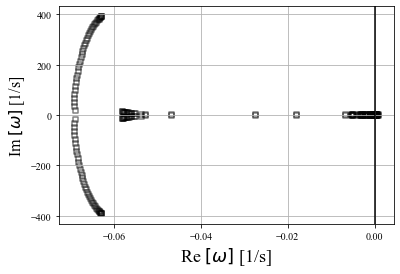

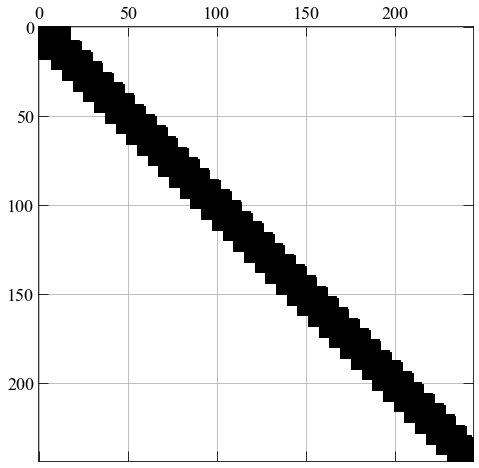

In [9]:
# ===============================================================
# SEMI-DISCRETIZED
# ===============================================================
if discretization == "semi_discretized":
    R = - Bm + visc*Cm
    # Compute directional derivative about u in the direction of du (Jacobian)
    dF = derivative (R, variable, dvariable)
    dummy = (inner (Constant (0.0), v1) + inner (Constant (0.0), v2) + inner (Constant (0.0), v3) + inner (Constant (0.0), v4))*dx

####################
    # Assemble stiffness form
    A_stiffness = PETScMatrix ()
    b_stiffness = PETScVector ()

    if any ([system == "system_1", system == "system_2"]):    
        # assemble (dF, tensor = A_stiffness) # Alternative 1
        bcs = [] # Alternative 2
        A_stiffness, _ = assemble_system(dF, dummy, bcs = bcs, A_tensor = A_stiffness, b_tensor = b_stiffness) # Alternative 2

        A1 = matrix(A_stiffness.array ())
        condnumber = LA.cond (A1)
        print ("Condition number:", condnumber)

        # https://fenicsproject.org/docs/dolfin/1.4.0/python/programmers-reference/cpp/la/SLEPcEigenSolver.html
        # PETScOptions.set ("st_ksp_type", "preonly")
        # PETScOptions.set ("st_pc_type", "lu")
        # PETScOptions.set ("st_pc_factor_mat_solver_package", "mumps")

        # Create eigensolver
        eigensolver = SLEPcEigenSolver (A_stiffness) #(A, B)
        prm1 = eigensolver.parameters 
        PETScOptions.set ("eps_view")
        prm1["solver"]             = "subspace" # OPTIONS: "krylov-schur", "arnoldi", "power", "subspace"
        prm1["problem_type"]       = "non_hermitian" # OPTIONS: "gen_hermitian", "non_hermitian"
        # prm1["spectrum"]           = "target magnitude" # OPTIONS: "target magnitude", "largest magnitude"
        # prm1["spectral_transform"] = "shift-and-invert" # OPTIONS: "shift-and-invert"
        # prm1["spectral_shift"]     = 0.9
        # neigs = 12
    elif system == "system_3":   
        # assemble (dF, tensor = A_stiffness) # Alternative 1
        bcs = [] # Alternative 2
        A_stiffness, _ = assemble_system(dF, dummy, bcs = bcs, A_tensor = A_stiffness, b_tensor = b_stiffness) # Alternative 2

        A1 = matrix(A_stiffness.array ())
        condnumber = LA.cond (A1)
        print ("Condition number:", condnumber)

        # https://fenicsproject.org/docs/dolfin/1.4.0/python/programmers-reference/cpp/la/SLEPcEigenSolver.html
        # PETScOptions.set ("st_ksp_type", "preonly")
        # PETScOptions.set ("st_pc_type", "lu")
        # PETScOptions.set ("st_pc_factor_mat_solver_package", "mumps")

        # Create eigensolver
        eigensolver = SLEPcEigenSolver (A_stiffness) #(A, B)
        prm1 = eigensolver.parameters 
        PETScOptions.set ("eps_view")
        # prm1["solver"]             = "subspace" # OPTIONS: "krylov-schur", "arnoldi", "power", "subspace"
        prm1["problem_type"]       = "non_hermitian" # OPTIONS: "gen_hermitian", "non_hermitian"
        # prm1["spectrum"]           = "target magnitude" # OPTIONS: "target magnitude", "largest magnitude"
        # prm1["spectral_transform"] = "shift-and-invert" # OPTIONS: "shift-and-invert"
        # prm1["spectral_shift"]     = 0.9
        # neigs = 12

    # Compute all eigenvalues of A x = \lambda x
    eigensolver.solve () #(neigs)

    #Exporting the real part of the eigenvectors and plotting
    #eigenvalues
    Real = []
    Imag = []

    for i in range (eigensolver.get_number_converged ()):
        r, c, rv, cv = eigensolver.get_eigenpair (i)

        Real.append (r)
        Imag.append (c)

    # print (Real)
    plt.figure (5, figsize = (8, 4))
    fig, ax = plt.subplots ()
    area = 25
    ax.scatter (Real, Imag, s = area, marker = listmarkers [0], color = listcolor [4], edgecolors = listcolor [0], linewidths = 1.5, alpha = 0.5)
    # ax.set_yscale ('symlog')

    plt.rcParams ['figure.figsize'] = [12, 8]
    # leg1 = ax.legend (loc = 'upper right', frameon = True, fontsize = 14);
    plt.grid (True, which = "both")
    plt.xlabel ('Re $[\omega]$ [1/s]', fontsize = 18)
    plt.ylabel ('Im $[\omega]$ [1/s]', fontsize = 16)
    # plt.xlim (-0.0025, -0.0015)
    # plt.ylim (-3, 3)
    matplotlib.rc ('xtick', labelsize = 18)     
    matplotlib.rc ('ytick', labelsize = 18)
    
    plt.axvline (0, label = 'pyplot vertical line', color = 'k')
    plt.show
    print ("Max Real", max (Real))
    print ("Min Real", min (Real))
    print ("Max Imag", max (Imag))
    print ("Min Imag", min (Imag))

    # Transform to numpy array
    A_mat = as_backend_type (A_stiffness).mat ()
    A_sparray = csr_matrix (A_mat.getValuesCSR ()[::-1], shape = A_mat.size)

    # Plot stiffness matrix
    plt.figure (6, figsize = (8, 4))
    fig, ax = plt.subplots ()
    plt.spy (A_sparray, color = 'k')
    plt.grid (True, which = "both")
    # # plt.xlim (0, l)
    # # ax.set_xlabel (r'L [m]', fontsize = 18)
    # # ax.set_ylabel (r'$p_i$ [Pa]', fontsize = 18)
    ax.xaxis.set_tick_params (which = 'major', size = 10, direction = 'in', top = 'on')
    ax.xaxis.set_tick_params (which = 'minor', size = 7, direction = 'in', top = 'on')
    ax.yaxis.set_tick_params (which = 'major', size = 10, direction = 'in', right = 'on')
    ax.yaxis.set_tick_params (which = 'minor', size = 7, direction = 'in', right = 'on')

    # Print mtrix
    print ("A_sparray = ", A_sparray)


In [10]:
# ===============================================================
# FULLY-DISCRETIZED
# ===============================================================
if discretization == "fully_discretized":
    if any ([system == "system_1", system == "system_2"]):   
        # L2 norm for each time step
        L2norm_variable1 = []
        L2norm_variable2 = []
        L2norm_variable3 = []
        L2norm_variable4 = []
        # Time vector for L2 norm computation
        timevector = np.linspace(0, T, num_steps)

        # Step in time
        t = 0
        while (t < T):
            # Condition for Dirichlet boundary conditions
            if IBVP == 'SS_perturbed':
                variable1_dirichlet.timedirichlet = t
                variable2_dirichlet.timedirichlet = t
                variable3_dirichlet.timedirichlet = t
                variable4_dirichlet.timedirichlet = t
            else:
                pass

    # ===============================================================
    # CURRENT TIME BDF1
    # ===============================================================
            if time_method == 'BDF1':
                # Method
                print ('INFO: first-order Backward differentiation formula time integration.')

                # Initial conditions
                if t == 0:
                    (variable1_n, variable2_n, variable3_n, variable4_n) = variable_n.split (deepcopy = True)
                    # Compute  nodal values (initial)
                    n_val1_n = np.array (variable1_n.vector ())
                    n_val2_n = np.array (variable2_n.vector ())
                    n_val3_n = np.array (variable3_n.vector ())
                    n_val4_n = np.array (variable4_n.vector ())

                    nodal_variable1_n = n_val1_n [::-1]
                    nodal_variable2_n = n_val2_n [::-1]
                    nodal_variable3_n = n_val3_n [::-1]
                    nodal_variable4_n = n_val4_n [::-1]

                    # print ("n", nodal_variable1_n)

                    nodes_variable1_n = len (nodal_variable1_n)
                    nodes_variable2_n = len (nodal_variable2_n)
                    nodes_variable3_n = len (nodal_variable3_n)
                    nodes_variable4_n = len (nodal_variable4_n)

                    # print ("dof subspace variable1 =", nodes_variable1_n)
                    # print ("dof subspace variable2 =", nodes_variable2_n)
                    # print ("dof subspace variable3 =", nodes_variable3_n)
                    # print ("dof subspace variable4 =", nodes_variable4_n)

                    # Compute vertex values (initial step)
                    v_variable1_n = variable1_n.compute_vertex_values (mesh)
                    v_variable2_n = variable2_n.compute_vertex_values (mesh)
                    v_variable3_n = variable3_n.compute_vertex_values (mesh)
                    v_variable4_n = variable4_n.compute_vertex_values (mesh)

                    vert_variable1_n = []
                    vert_variable2_n = []
                    vert_variable3_n = []
                    vert_variable4_n = []

                    for cond_vert in range (len (coordinates)):
                            vert_variable1_n.append (v_variable1_n[cond_vert])
                            vert_variable2_n.append (v_variable2_n[cond_vert])
                            vert_variable3_n.append (v_variable3_n[cond_vert])
                            vert_variable4_n.append (v_variable4_n[cond_vert])
                    
                    vert_variable1_n = np.asarray (vert_variable1_n)
                    vert_variable2_n = np.asarray (vert_variable2_n)
                    vert_variable3_n = np.asarray (vert_variable3_n)
                    vert_variable4_n = np.asarray (vert_variable4_n)

                    print ("variable1_n = ", vert_variable1_n)

                    # if simulation == 'linear_stability':
                        # Well-posedness check
                        # i = 0
                        # for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n, vert_variable2_n, vert_variable3_n, vert_variable4_n):
                        #     Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                        #     Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                        #     m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                        #     listreal = []
                        #     listimag = []

                        #     for cond0 in range (len (m_test)):
                        #         realpart = m_test [cond0].real                
                        #         imagpart = m_test [cond0].imag
                                
                        #         listimag.append (imagpart)
                        #         listreal.append (realpart)
                            
                        #     if any ([ cond1 != 0 for cond1 in listimag ]) :
                        #         print ("INFO: ill-posed equation system")
                        #         break
                        #     else:
                        #         i += 1
                        #     break

                        # # Condition for low liquid level of transition to intermittent flow
                        # if any ([cond2 <= 0 for cond2 in vert_variable1_n]) :
                        #     print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                        #     break
                        # elif any ([cond2 >= 1 for cond2 in vert_variable1_n]):
                        #     print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                        #     break
                        # else:
                        #     pass
                        # # Condition for positive velocities and pressure
                        # if any ([ cond3 <= 0 for cond3 in vert_variable2_n]) :
                        #     print ("INFO: negative liquid velocity")
                        #     break
                        # else:
                        #     pass

                        # if any ([ cond4 <= 0 for cond4 in vert_variable3_n]) :
                        #     print ("INFO: negative gas velocity")
                        #     break
                        # else:
                        #     pass

                        # if any ([ cond5 <= 0 for cond5 in vert_variable4_n]) :
                        #     print ("INFO: negative pressure")
                        #     break
                        # else:
                        #     pass
                        
                        # # Reynolds check
                        # Rel_n = Re_l (vert_variable1_n, vert_variable2_n)
                        # Reg_n = Re_g (vert_variable1_n, vert_variable3_n, vert_variable4_n)

                        # if any ([ cond3 <= 1180 for cond3 in Rel_n]):
                        # # Rel < 1180:
                        #     print ("Liquid laminar")
                        # elif  any ([ cond3 > 1180 for cond3 in Rel_n]):
                        #     pass

                        # if any ([ cond4 <= 1180 for cond4 in Reg_n]):
                        #     print ("Gas laminar")
                        # elif  any ([ cond4 > 1180 for cond4 in Reg_n]):
                        #     pass

                    # Plot solution
                    plt.figure (5, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.ylim (0, 1)
                    plt.grid (True, which = "both")
                    plot (variable1_n, title = r"$\alpha_l$", rescale = False)

                    plt.figure (6, figsize = (8, 4))
                    plt.xlim (0, l)
                    # plt.ylim (min (vert_variable2_n), max (vert_variable2_n))
                    plt.grid (True, which = "both")
                    plot (variable2_n, title = r"$u_l$", rescale = False)

                    plt.figure (7, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable3_n, title = r"$u_g$", rescale = False)

                    plt.figure (8, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable4_n, title = r"$p_i$", rescale = False)
                    
                    # Save solution
                    ff_variable1 << variable1_n
                    ff_variable2 << variable2_n
                    ff_variable3 << variable3_n
                    ff_variable4 << variable4_n
                else:
                    pass

                # Time stepping
                t += dt
                
                # Print progress
                # clear_output ()
                print ("Iteration :", int (round (t/dt)), "of", num_steps)
                print ("Time      :", t, "s")
                                
                # Parameters
                a0 = 1
                a1 = -1
                a2 = 0
                theta = 1
                
                # Amat
                Am1 = ( (a0*variable1 + a1*variable1_n + a2*variable1_past)/dt*v1 )*dx 
                Am2 = ( (a0*variable2 + a1*variable2_n + a2*variable1_past)/dt*v2 )*dx 
                Am3 = ( (a0*variable3 + a1*variable3_n + a2*variable1_past)/dt*v3 )*dx 
                Am4 = ( (a0*variable4 + a1*variable4_n + a2*variable1_past)/dt*v4 )*dx

                Am = Am1 + Am2 + Am3 + Am4

                # Variational form
                F = visc*Cm - Bm
                F_n = visc*Cm_n - Bm_n
                R = Am - theta*F - (1 - theta)*F_n 

                # Compute directional derivative about u in the direction of du (Jacobian)
                dF = derivative (R, variable, dvariable)

                # Define transient solver function
                # solver_input (R, variable, bcs, dF, ffc_options)

                problem = NonlinearVariationalProblem (R, variable, bcs = bcs, J = dF, form_compiler_parameters = ffc_options)

                transientsolver = NonlinearVariationalSolver (problem)
                prm = transientsolver.parameters
                info (prm, True)

                # Nonlinear solver
                prm ['nonlinear_solver'] = 'newton'
                # prm ['print_matrix']     = False #True
                # prm ['print_rhs']        = False #True
                # prm ['symmetric']        = False #True

                # Linear solver
                # prm ['newton_solver']['absolute_tolerance']      = 1e-1 #1E-8
                # prm ['newton_solver']['convergence_criterion']   = 'residual' #'residual' 'incremental'
                # prm ['newton_solver']['error_on_nonconvergence'] = True
                prm ['newton_solver']['linear_solver']           = 'umfpack' # 'bicgstab' 'cg' 'gmres' 'minres' 'petsc' 'richardson' 'superlu_dist' 'tfqmr' 'umfpack'
                # prm ['newton_solver']['maximum_iterations']      = 10000
                # prm ['newton_solver']['preconditioner']          = 'ilu' # 'ilu' 'icc' 'petsc_amg' 'sor'
                # prm ['newton_solver']['relative_tolerance']      = 1e-1
                # prm ['newton_solver']['relaxation_parameter']    = 1.0
                # prm ['newton_solver']['report']                  = True

                # Krylov solver
                # prm ['newton_solver']['krylov_solver']['absolute_tolerance']       = 1e-3 #1E-9
                # #     prm ['newton_solver']['krylov_solver']['error_on_nonconvergence']  = True
                # prm ['newton_solver']['krylov_solver']['maximum_iterations']       = 10000 # 500000
                # prm ['newton_solver']['krylov_solver']["monitor_convergence"]      = True
                # prm ['newton_solver']['krylov_solver']["nonzero_initial_guess"]    = True #False
                # prm ['newton_solver']['krylov_solver']['relative_tolerance']       = 1e-3
                # prm ['newton_solver']['krylov_solver']['report']                   = True
                    
                # LU solver
                # prm ['newton_solver']['lu_solver']['report']    = True
                # prm ['newton_solver']['lu_solver']['symmetric'] = False
                # prm ['newton_solver']['lu_solver']['verbose']   = True

                transientsolver.solve ()  

                # Split of the vector var
                (variable1, variable2, variable3, variable4) = variable.split (deepcopy = True)

                # L2 norm
                # infonorm = variable1.vector ().norm("l2")
                # print ("Solution vector norm (0): {!r}".format (infonorm)) 
                L2norm_variable1.append (variable1.vector ().norm("l2"))
                L2norm_variable2.append (variable2.vector ().norm("l2"))   
                L2norm_variable3.append (variable3.vector ().norm("l2"))   
                L2norm_variable4.append (variable4.vector ().norm("l2"))   

                # Nodal values (current)
                n_val1_n1 = np.array(variable1.vector ())
                n_val2_n1 = np.array(variable2.vector ())
                n_val3_n1 = np.array(variable3.vector ())
                n_val4_n1 = np.array(variable4.vector ())

                nodal_variable1_n1 = n_val1_n1 [::-1]
                nodal_variable2_n1 = n_val2_n1 [::-1]
                nodal_variable3_n1 = n_val3_n1 [::-1]
                nodal_variable4_n1 = n_val4_n1 [::-1]

                # print ("n+1", nodal_variable1_n1)

                # Compute vertex values (next step)
                vert_variable1 = variable1.compute_vertex_values (mesh)
                vert_variable2 = variable2.compute_vertex_values (mesh)
                vert_variable3 = variable3.compute_vertex_values (mesh)
                vert_variable4 = variable4.compute_vertex_values (mesh)

                vert_variable1_n1 = []
                vert_variable2_n1 = []
                vert_variable3_n1 = []
                vert_variable4_n1 = []

                for cond_vert in range (len (coordinates)):
                    vert_variable1_n1.append (vert_variable1[cond_vert])
                    vert_variable2_n1.append (vert_variable2[cond_vert])
                    vert_variable3_n1.append (vert_variable3[cond_vert])
                    vert_variable4_n1.append (vert_variable4[cond_vert])
            
                vert_variable1_n1 = np.asarray (vert_variable1_n1)
                vert_variable2_n1 = np.asarray (vert_variable2_n1)
                vert_variable3_n1 = np.asarray (vert_variable3_n1)
                vert_variable4_n1 = np.asarray (vert_variable4_n1)

                print ("variable1_n1 = ", vert_variable1_n1)

                # if simulation == 'linear_stability':
                #     # Well-posedness check
                #     i = 0
                #     for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n1, vert_variable2_n1, vert_variable3_n1, vert_variable4_n1):
                #         Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                #         Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                #         m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                #         listreal = []
                #         listimag = []

                #         for cond0 in range (len (m_test)):
                #             realpart = m_test [cond0].real                
                #             imagpart = m_test [cond0].imag
                            
                #             listimag.append (imagpart)
                #             listreal.append (realpart)
                        
                #         if any ([ cond1 != 0 for cond1 in listimag ]) :
                #             print ("INFO: ill-posed equation system")
                #             break
                #         else:
                #             i += 1
                #         break

                #     # Condition for low liquid level of transition to intermittent flow
                #     if any ([cond2 <= 0 for cond2 in vert_variable1_n1]) :
                #         print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                #         break
                #     elif any ([cond2 >= 1 for cond2 in vert_variable1_n1]):
                #         print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                #         break
                #     else:
                #         pass
                #     # Condition for positive velocities and pressure
                #     if any ([ cond3 <= 0 for cond3 in vert_variable2_n1]) :
                #         print ("INFO: negative liquid velocity")
                #         break
                #     else:
                #         pass

                #     if any ([ cond4 <= 0 for cond4 in vert_variable3_n1]) :
                #         print ("INFO: negative gas velocity")
                #         break
                #     else:
                #         pass

                #     if any ([ cond5 <= 0 for cond5 in vert_variable4_n1]) :
                #         print ("INFO: negative pressure")
                #         break
                #     else:
                #         pass
                    
                #     # Reynolds check
                #     Rel_n1 = Re_l (vert_variable1_n1, vert_variable2_n1)
                #     Reg_n1 = Re_g (vert_variable1_n1, vert_variable3_n1, vert_variable4_n1)

                #     if any ([ cond3 <= 1180 for cond3 in Rel_n1]):
                #     # Rel < 1180:
                #         print ("Liquid laminar")
                #     elif  any ([ cond3 > 1180 for cond3 in Rel_n1]):
                #         pass

                #     if any ([ cond4 <= 1180 for cond4 in Reg_n1]):
                #         print ("Gas laminar")
                #     elif  any ([ cond4 > 1180 for cond4 in Reg_n1]):
                #         pass

    # ===============================================================
    # CURRENT TIME CN
    # ===============================================================
            elif time_method == 'CN':
                # Method
                print ('INFO: Crank-Nicolson/trapezoidal time integration.')
                
                # Initial conditions
                if t == 0:
                    (variable1_n, variable2_n, variable3_n, variable4_n) = var_n.split (deepcopy = True)
                    # Compute  nodal values (initial)
                    n_val1_n = np.array (variable1_n.vector ())
                    n_val2_n = np.array (variable2_n.vector ())
                    n_val3_n = np.array (variable3_n.vector ())
                    n_val4_n = np.array (variable4_n.vector ())

                    nodal_variable1_n = n_val1_n [::-1]
                    nodal_variable2_n = n_val2_n [::-1]
                    nodal_variable3_n = n_val3_n [::-1]
                    nodal_variable4_n = n_val4_n [::-1]

                    # print ("n", nodal_variable1_n)

                    nodes_variable1_n = len (nodal_variable1_n)
                    nodes_variable2_n = len (nodal_variable2_n)
                    nodes_variable3_n = len (nodal_variable3_n)
                    nodes_variable4_n = len (nodal_variable4_n)

                    # print ("dof subspace variable1 =", nodes_variable1_n)
                    # print ("dof subspace variable2 =", nodes_variable2_n)
                    # print ("dof subspace variable3 =", nodes_variable3_n)
                    # print ("dof subspace variable4 =", nodes_variable4_n)

                    # Compute vertex values (initial step)
                    v_variable1_n = variable1_n.compute_vertex_values (mesh)
                    v_variable2_n = variable2_n.compute_vertex_values (mesh)
                    v_variable3_n = variable3_n.compute_vertex_values (mesh)
                    v_variable4_n = variable4_n.compute_vertex_values (mesh)

                    vert_variable1_n = []
                    vert_variable2_n = []
                    vert_variable3_n = []
                    vert_variable4_n = []

                    for cond_vert in range (len (coordinates)):
                            vert_variable1_n.append (v_variable1_n[cond_vert])
                            vert_variable2_n.append (v_variable2_n[cond_vert])
                            vert_variable3_n.append (v_variable3_n[cond_vert])
                            vert_variable4_n.append (v_variable4_n[cond_vert])
                    
                    vert_variable1_n = np.asarray (vert_variable1_n)
                    vert_variable2_n = np.asarray (vert_variable2_n)
                    vert_variable3_n = np.asarray (vert_variable3_n)
                    vert_variable4_n = np.asarray (vert_variable4_n)

                    print ("variable1_n = ", vert_variable1_n)

                    if simulation == 'linear_stability':
                        # Well-posedness check
                        i = 0
                        for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n, vert_variable2_n, vert_variable3_n, vert_variable4_n):
                            Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                            Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                            m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                            listreal = []
                            listimag = []

                            for cond0 in range (len (m_test)):
                                realpart = m_test [cond0].real                
                                imagpart = m_test [cond0].imag
                                
                                listimag.append (imagpart)
                                listreal.append (realpart)
                            
                            if any ([ cond1 != 0 for cond1 in listimag ]) :
                                print ("INFO: ill-posed equation system")
                                break
                            else:
                                i += 1
                            break

                        # Condition for low liquid level of transition to intermittent flow
                        if any ([cond2 <= 0 for cond2 in vert_variable1_n]) :
                            print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                            break
                        elif any ([cond2 >= 1 for cond2 in vert_variable1_n]):
                            print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                            break
                        else:
                            pass
                        # Condition for positive velocities and pressure
                        if any ([ cond3 <= 0 for cond3 in vert_variable2_n]) :
                            print ("INFO: negative liquid velocity")
                            break
                        else:
                            pass

                        if any ([ cond4 <= 0 for cond4 in vert_variable3_n]) :
                            print ("INFO: negative gas velocity")
                            break
                        else:
                            pass

                        if any ([ cond5 <= 0 for cond5 in vert_variable4_n]) :
                            print ("INFO: negative pressure")
                            break
                        else:
                            pass
                        
                        # Reynolds check
                        Rel_n = Re_l (vert_variable1_n, vert_variable2_n)
                        Reg_n = Re_g (vert_variable1_n, vert_variable3_n, vert_variable4_n)

                        if any ([ cond3 <= 1180 for cond3 in Rel_n]):
                        # Rel < 1180:
                            print ("Liquid laminar")
                        elif  any ([ cond3 > 1180 for cond3 in Rel_n]):
                            pass

                        if any ([ cond4 <= 1180 for cond4 in Reg_n]):
                            print ("Gas laminar")
                        elif  any ([ cond4 > 1180 for cond4 in Reg_n]):
                            pass

                    # Plot solution
                    plt.figure (5, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.ylim (0, 1)
                    plt.grid (True, which = "both")
                    plot (variable1_n, title = r"$\alpha_l$", rescale = False)

                    plt.figure (6, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.ylim (min (vert_variable2_n), max (vert_variable2_n))
                    plt.grid (True, which = "both")

                    plot (variable2_n, title = r"$u_l$", rescale = False)

                    plt.figure (7, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable3_n, title = r"$u_g$", rescale = False)

                    plt.figure (8, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable4_n, title = r"$p_i$", rescale = False)
                    
                    # Save solution
                    ff_variable1 << variable1_n
                    ff_variable2 << variable2_n
                    ff_variable3 << variable3_n
                    ff_variable4 << variable4_n
                else:
                    pass

                # Time stepping
                t += dt
                
                # Print progress
                clear_output ()
                print ("Iteration :", int (round (t/dt)), "of", num_steps)
                print ("Time      :", t, "s")

                # Parameters
                a0 = 1
                a1 = -1
                a2 = 0
                theta = 1/2

                # Amat
                Am1 = ( (a0*variable1 + a1*variable1_n + a2*variable1_past)/dt*v1 )*dx 
                Am2 = ( (a0*variable2 + a1*variable2_n + a2*variable1_past)/dt*v2 )*dx 
                Am3 = ( (a0*variable3 + a1*variable3_n + a2*variable1_past)/dt*v3 )*dx 
                Am4 = ( (a0*variable4 + a1*variable4_n + a2*variable1_past)/dt*v4 )*dx

                Am = Am1 + Am2 + Am3 + Am4

                # Variational form
                F = visc*Cm - Bm
                F_n = visc*Cm_n - Bm_n
                R = Am - theta*F - (1 - theta)*F_n 

                # Compute directional derivative about u in the direction of du (Jacobian)
                dF = derivative (R, var, dvar)

                # Define transient solver function
                solver_input (R, variable, bcs, dF)#, ffc_options)

                # Split of the vector var
                (variable1, variable2, variable3, variable4) = variable.split (deepcopy = True)

                # L2 norm
                # infonorm = variable1.vector ().norm ("l2")
                # print ("Solution vector norm (0): {!r}".format (infonorm)) 
                # L2norm_variable1.append (variable1.vector ().norm ("l2"))
                # L2norm_variable2.append (variable2.vector ().norm ("l2"))   
                # L2norm_variable3.append (variable3.vector ().norm ("l2"))   
                # L2norm_variable4.append (variable4.vector ().norm ("l2"))   

                # Nodal values (current)
                n_val1_n1 = np.array(variable1.vector ())
                n_val2_n1 = np.array(variable2.vector ())
                n_val3_n1 = np.array(variable3.vector ())
                n_val4_n1 = np.array(variable4.vector ())

                nodal_variable1_n1 = n_val1_n1 [::-1]
                nodal_variable2_n1 = n_val2_n1 [::-1]
                nodal_variable3_n1 = n_val3_n1 [::-1]
                nodal_variable4_n1 = n_val4_n1 [::-1]

                # Compute vertex values (next step)
                vert_variable1 = variable1.compute_vertex_values (mesh)
                vert_variable2 = variable2.compute_vertex_values (mesh)
                vert_variable3 = variable3.compute_vertex_values (mesh)
                vert_variable4 = variable4.compute_vertex_values (mesh)

                vert_variable1_n1 = []
                vert_variable2_n1 = []
                vert_variable3_n1 = []
                vert_variable4_n1 = []

                for cond_vert in range (len (coordinates)):
                    vert_variable1_n1.append (vert_variable1[cond_vert])
                    vert_variable2_n1.append (vert_variable2[cond_vert])
                    vert_variable3_n1.append (vert_variable3[cond_vert])
                    vert_variable4_n1.append (vert_variable4[cond_vert])
            
                vert_variable1_n1 = np.asarray (vert_variable1_n1)
                vert_variable2_n1 = np.asarray (vert_variable2_n1)
                vert_variable3_n1 = np.asarray (vert_variable3_n1)
                vert_variable4_n1 = np.asarray (vert_variable4_n1)

                print ("variable1_n1 = ", vert_variable1_n1)

                if simulation == 'linear_stability':
                    # Well-posedness check
                    i = 0
                    for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n1, vert_variable2_n1, vert_variable3_n1, vert_variable4_n1):
                        Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                        Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                        m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                        listreal = []
                        listimag = []

                        for cond0 in range (len (m_test)):
                            realpart = m_test [cond0].real                
                            imagpart = m_test [cond0].imag
                            
                            listimag.append (imagpart)
                            listreal.append (realpart)
                        
                        if any ([ cond1 != 0 for cond1 in listimag ]) :
                            print ("INFO: ill-posed equation system")
                            break
                        else:
                            i += 1
                        break

                    # Condition for low liquid level of transition to intermittent flow
                    if any ([cond2 <= 0 for cond2 in vert_variable1_n1]) :
                        print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                        break
                    elif any ([cond2 >= 1 for cond2 in vert_variable1_n1]):
                        print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                        break
                    else:
                        pass
                    # Condition for positive velocities and pressure
                    if any ([ cond3 <= 0 for cond3 in vert_variable2_n1]) :
                        print ("INFO: negative liquid velocity")
                        break
                    else:
                        pass

                    if any ([ cond4 <= 0 for cond4 in vert_variable3_n1]) :
                        print ("INFO: negative gas velocity")
                        break
                    else:
                        pass

                    if any ([ cond5 <= 0 for cond5 in vert_variable4_n1]) :
                        print ("INFO: negative pressure")
                        break
                    else:
                        pass
                    
                    # Reynolds check
                    Rel_n1 = Re_l (vert_variable1_n1, vert_variable2_n1)
                    Reg_n1 = Re_g (vert_variable1_n1, vert_variable3_n1, vert_variable4_n1)

                    if any ([ cond3 <= 1180 for cond3 in Rel_n1]):
                    # Rel < 1180:
                        print ("Liquid laminar")
                    elif  any ([ cond3 > 1180 for cond3 in Rel_n1]):
                        pass

                    if any ([ cond4 <= 1180 for cond4 in Reg_n1]):
                        print ("Gas laminar")
                    elif  any ([ cond4 > 1180 for cond4 in Reg_n1]):
                        pass

    # ===============================================================
    # CURRENT TIME BDF2
    # ===============================================================
            if time_method == 'BDF2':
                # Method
                print ('INFO: second-order Backward differentiation formula time integration.')

                # Initial conditions
                if t == 0:
                    (variable1_past, variable2_past, variable3_past, variable4_past) = variable_past.split (deepcopy = True)
                    # Compute  nodal values (initial)
                    # n_val1_past = np.array (variable1_past.vector ())
                    # n_val2_past = np.array (variable2_past.vector ())
                    # n_val3_past = np.array (variable3_past.vector ())
                    # n_val4_past = np.array (variable4_past.vector ())

                    # nodal_variable1_past = n_val1_past [::-1]
                    # nodal_variable2_past = n_val2_past [::-1]
                    # nodal_variable3_past = n_val3_past [::-1]
                    # nodal_variable4_past = n_val4_past [::-1]

                    # # print ("n", nodal_variable1_n)

                    # nodes_variable1_past = len (nodal_variable1_past)
                    # nodes_variable2_past = len (nodal_variable2_past)
                    # nodes_variable3_past = len (nodal_variable3_past)
                    # nodes_variable4_past = len (nodal_variable4_past)

                    # print ("dof subspace variable1 =", nodes_variable1_past)
                    # print ("dof subspace variable2 =", nodes_variable2_past)
                    # print ("dof subspace variable3 =", nodes_variable3_past)
                    # print ("dof subspace variable4 =", nodes_variable4_past)

                    # Compute vertex values (initial step)
                    v_variable1_past = variable1_past.compute_vertex_values (mesh)
                    v_variable2_past = variable2_past.compute_vertex_values (mesh)
                    v_variable3_past = variable3_past.compute_vertex_values (mesh)
                    v_variable4_past = variable4_past.compute_vertex_values (mesh)

                    vert_variable1_past = []
                    vert_variable2_past = []
                    vert_variable3_past = []
                    vert_variable4_past = []

                    for cond_vert in range (len (coordinates)):
                        vert_variable1_past.append (v_variable1_past[cond_vert])
                        vert_variable2_past.append (v_variable2_past[cond_vert])
                        vert_variable3_past.append (v_variable3_past[cond_vert])
                        vert_variable4_past.append (v_variable4_past[cond_vert])
                    
                    vert_variable1_past = np.asarray (vert_variable1_past)
                    vert_variable2_past = np.asarray (vert_variable2_past)
                    vert_variable3_past = np.asarray (vert_variable3_past)
                    vert_variable4_past = np.asarray (vert_variable4_past)

                    print ("variable1_past = ", vert_variable1_past)

                    # # Well-posedness check
                    # i = 0
                    # for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n, vert_variable2_n, vert_variable3_n, vert_variable4_n):
                    #     Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                    #     Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                    #     m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                    #     listreal = []
                    #     listimag = []

                    #     for cond0 in range (len (m_test)):
                    #         realpart = m_test [cond0].real                
                    #         imagpart = m_test [cond0].imag
                            
                    #         listimag.append (imagpart)
                    #         listreal.append (realpart)
                        
                    #     if any ([ cond1 != 0 for cond1 in listimag ]) :
                    #         print ("INFO: ill-posed equation system")
                    #         break
                    #     else:
                    #         i += 1
                    #     break

                    # # Condition for low liquid level of transition to intermittent flow
                    # if any ([cond2 <= 0 for cond2 in vert_variable1_n]) :
                    #     print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                    #     break
                    # elif any ([cond2 >= 1 for cond2 in vert_variable1_n]):
                    #     print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                    #     break
                    # else:
                    #     pass
                    # # Condition for positive velocities and pressure
                    # if any ([ cond3 <= 0 for cond3 in vert_variable2_n]) :
                    #     print ("INFO: negative liquid velocity")
                    #     break
                    # else:
                    #     pass

                    # if any ([ cond4 <= 0 for cond4 in vert_variable3_n]) :
                    #     print ("INFO: negative gas velocity")
                    #     break
                    # else:
                    #     pass

                    # if any ([ cond5 <= 0 for cond5 in vert_variable4_n]) :
                    #     print ("INFO: negative pressure")
                    #     break
                    # else:
                    #     pass
                    
                    # # Reynolds check
                    # Rel_n = Re_l (vert_variable1_n, vert_variable2_n)
                    # Reg_n = Re_g (vert_variable1_n, vert_variable3_n, vert_variable4_n)

                    # if any ([ cond3 <= 1180 for cond3 in Rel_n]):
                    # # Rel < 1180:
                    #     print ("Liquid laminar")
                    # elif  any ([ cond3 > 1180 for cond3 in Rel_n]):
                    #     pass

                    # if any ([ cond4 <= 1180 for cond4 in Reg_n]):
                    #     print ("Gas laminar")
                    # elif  any ([ cond4 > 1180 for cond4 in Reg_n]):
                    #     pass

                    # Plot solution
                    plt.figure (5, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.ylim (0, 1)
                    plt.grid (True, which = "both")
                    plot (variable1_past, title = r"$\alpha_l$", rescale = False)

                    plt.figure (6, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.ylim (min (vert_variable2_past), max (vert_variable2_past))
                    plt.grid (True, which = "both")
                    plot (variable2_past, title = r"$u_l$", rescale = False)

                    plt.figure (7, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable3_past, title = r"$u_g$", rescale = False)

                    plt.figure (8, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable4_past, title = r"$p_i$", rescale = False)
                    
                    # Save solution
                    ff_variable1 << variable1_past
                    ff_variable2 << variable2_past
                    ff_variable3 << variable3_past
                    ff_variable4 << variable4_past

                    # Time stepping
                    t = dt/2
                                    
                    # Parameters
                    a0 = 1
                    a1 = -1
                    a2 = 0
                    theta = 1
                    
                    # Amat
                    Am1 = ( (a0*variable1_n + a1*variable1_past)/dt*v1 )*dx 
                    Am2 = ( (a0*variable2_n + a1*variable1_past)/dt*v2 )*dx 
                    Am3 = ( (a0*variable3_n + a1*variable1_past)/dt*v3 )*dx 
                    Am4 = ( (a0*variable4_n + a1*variable1_past)/dt*v4 )*dx

                    Am = Am1 + Am2 + Am3 + Am4

                    # Variational form
                    F_n = visc*Cm_n - Bm_n
                    F_past = visc*Cm_past - Bm_past
                    R = Am - theta*F_n - (1 - theta)*F_past 

                    # Compute directional derivative about u in the direction of du (Jacobian)
                    dF = derivative (R, variable_n, dvariable)

                    # Define transient solver function
                    solver_input (R, variable_n, bcs, dF)#, ffc_options)

                    # Split of the vector var
                    (variable1_n, variable2_n, variable3_n, variable4_n) = variable_n.split (deepcopy = True)

                    # L2 norm
                    # infonorm = variable1.vector ().norm("l2")
                    # print ("Solution vector norm (0): {!r}".format (infonorm)) 
                    # L2norm_variable1.append (variable1.vector ().norm ("l2"))
                    # L2norm_variable2.append (variable2.vector ().norm ("l2"))   
                    # L2norm_variable3.append (variable3.vector ().norm ("l2"))   
                    # L2norm_variable4.append (variable4.vector ().norm ("l2"))   

                    # Nodal values (current)
                    # n_val1_n1 = np.array (variable1.vector ())
                    # n_val2_n1 = np.array (variable2.vector ())
                    # n_val3_n1 = np.array (variable3.vector ())
                    # n_val4_n1 = np.array (variable4.vector ())

                    # nodal_variable1_n1 = n_val1_n1 [::-1]
                    # nodal_variable2_n1 = n_val2_n1 [::-1]
                    # nodal_variable3_n1 = n_val3_n1 [::-1]
                    # nodal_variable4_n1 = n_val4_n1 [::-1]

                    # # print ("n+1", nodal_variable1_n1)

                    # # Compute vertex values (next step)
                    # vert_variable1 = variable1.compute_vertex_values (mesh)
                    # vert_variable2 = variable2.compute_vertex_values (mesh)
                    # vert_variable3 = variable3.compute_vertex_values (mesh)
                    # vert_variable4 = variable4.compute_vertex_values (mesh)

                    # vert_variable1_n1 = []
                    # vert_variable2_n1 = []
                    # vert_variable3_n1 = []
                    # vert_variable4_n1 = []

                    # for cond_vert in range (len (coordinates)):
                    #     vert_variable1_n1.append (vert_variable1[cond_vert])
                    #     vert_variable2_n1.append (vert_variable2[cond_vert])
                    #     vert_variable3_n1.append (vert_variable3[cond_vert])
                    #     vert_variable4_n1.append (vert_variable4[cond_vert])
                
                    # vert_variable1_n1 = np.asarray (vert_variable1_n1)
                    # vert_variable2_n1 = np.asarray (vert_variable2_n1)
                    # vert_variable3_n1 = np.asarray (vert_variable3_n1)
                    # vert_variable4_n1 = np.asarray (vert_variable4_n1)

                    # print ("variable1_n1 = ", vert_variable1_n1)

                    # # Well-posedness check
                    # i = 0
                    # for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n1, vert_variable2_n1, vert_variable3_n1, vert_variable4_n1):
                    #     Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                    #     Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                    #     m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                    #     listreal = []
                    #     listimag = []

                    #     for cond0 in range (len (m_test)):
                    #         realpart = m_test [cond0].real                
                    #         imagpart = m_test [cond0].imag
                            
                    #         listimag.append (imagpart)
                    #         listreal.append (realpart)
                        
                    #     if any ([ cond1 != 0 for cond1 in listimag ]) :
                    #         print ("INFO: ill-posed equation system")
                    #         break
                    #     else:
                    #         i += 1
                    #     break

                    # # Condition for low liquid level of transition to intermittent flow
                    # if any ([cond2 <= 0 for cond2 in vert_variable1_n1]) :
                    #     print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                    #     break
                    # elif any ([cond2 >= 1 for cond2 in vert_variable1_n1]):
                    #     print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                    #     break
                    # else:
                    #     pass
                    # # Condition for positive velocities and pressure
                    # if any ([ cond3 <= 0 for cond3 in vert_variable2_n1]) :
                    #     print ("INFO: negative liquid velocity")
                    #     break
                    # else:
                    #     pass

                    # if any ([ cond4 <= 0 for cond4 in vert_variable3_n1]) :
                    #     print ("INFO: negative gas velocity")
                    #     break
                    # else:
                    #     pass

                    # if any ([ cond5 <= 0 for cond5 in vert_variable4_n1]) :
                    #     print ("INFO: negative pressure")
                    #     break
                    # else:
                    #     pass
                    
                    # # Reynolds check
                    # Rel_n1 = Re_l (vert_variable1_n1, vert_variable2_n1)
                    # Reg_n1 = Re_g (vert_variable1_n1, vert_variable3_n1, vert_variable4_n1)

                    # if any ([ cond3 <= 1180 for cond3 in Rel_n1]):
                    # # Rel < 1180:
                    #     print ("Liquid laminar")
                    # elif  any ([ cond3 > 1180 for cond3 in Rel_n1]):
                    #     pass

                    # if any ([ cond4 <= 1180 for cond4 in Reg_n1]):
                    #     print ("Gas laminar")
                    # elif  any ([ cond4 > 1180 for cond4 in Reg_n1]):
                    #     pass
                    
                    t = 0
                else:
                    pass

                # Time stepping
                t += dt
                
                # Print progress
                clear_output ()
                print ("Iteration :", int (round (t/dt)), "of", num_steps)
                print ("Time      :", t, "s")
                                
                # Parameters
                a0 = 3/2
                a1 = -2
                a2 = 1/2
                theta = 1
                
                # Amat
                Am1 = ( (a0*variable1 + a1*variable1_n + a2*variable1_past)/dt*v1 )*dx 
                Am2 = ( (a0*variable2 + a1*variable2_n + a2*variable1_past)/dt*v2 )*dx 
                Am3 = ( (a0*variable3 + a1*variable3_n + a2*variable1_past)/dt*v3 )*dx 
                Am4 = ( (a0*variable4 + a1*variable4_n + a2*variable1_past)/dt*v4 )*dx

                Am = Am1 + Am2 + Am3 + Am4

                # Variational form
                F = visc*Cm - Bm
                F_n = visc*Cm_n - Bm_n
                R = Am - theta*F - (1 - theta)*F_n 

                # Compute directional derivative about u in the direction of du (Jacobian)
                dF = derivative (R, var, dvar)

                # Define transient solver function
                solver_input (R, variable, bcs, dF)#, ffc_options)

                # Split of the vector var
                (variable1, variable2, variable3, variable4) = variable.split (deepcopy = True)

                # L2 norm
                # infonorm = variable1.vector ().norm("l2")
                # print ("Solution vector norm (0): {!r}".format (infonorm)) 
                L2norm_variable1.append (variable1.vector ().norm ("l2"))
                L2norm_variable2.append (variable2.vector ().norm ("l2"))   
                L2norm_variable3.append (variable3.vector ().norm ("l2"))   
                L2norm_variable4.append (variable4.vector ().norm ("l2"))   

                # Nodal values (current)
                n_val1_n1 = np.array(variable1.vector ())
                n_val2_n1 = np.array(variable2.vector ())
                n_val3_n1 = np.array(variable3.vector ())
                n_val4_n1 = np.array(variable4.vector ())

                nodal_variable1_n1 = n_val1_n1 [::-1]
                nodal_variable2_n1 = n_val2_n1 [::-1]
                nodal_variable3_n1 = n_val3_n1 [::-1]
                nodal_variable4_n1 = n_val4_n1 [::-1]

                # print ("n+1", nodal_variable1_n1)

                # Compute vertex values (next step)
                vert_variable1 = variable1.compute_vertex_values (mesh)
                vert_variable2 = variable2.compute_vertex_values (mesh)
                vert_variable3 = variable3.compute_vertex_values (mesh)
                vert_variable4 = variable4.compute_vertex_values (mesh)

                vert_variable1_n1 = []
                vert_variable2_n1 = []
                vert_variable3_n1 = []
                vert_variable4_n1 = []

                for cond_vert in range (len (coordinates)):
                    vert_variable1_n1.append (vert_variable1[cond_vert])
                    vert_variable2_n1.append (vert_variable2[cond_vert])
                    vert_variable3_n1.append (vert_variable3[cond_vert])
                    vert_variable4_n1.append (vert_variable4[cond_vert])
            
                vert_variable1_n1 = np.asarray (vert_variable1_n1)
                vert_variable2_n1 = np.asarray (vert_variable2_n1)
                vert_variable3_n1 = np.asarray (vert_variable3_n1)
                vert_variable4_n1 = np.asarray (vert_variable4_n1)

                print ("variable1_n1 = ", vert_variable1_n1)

                # Well-posedness check
                i = 0
                for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n1, vert_variable2_n1, vert_variable3_n1, vert_variable4_n1):
                    Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                    Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                    m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                    listreal = []
                    listimag = []

                    for cond0 in range (len (m_test)):
                        realpart = m_test [cond0].real                
                        imagpart = m_test [cond0].imag
                        
                        listimag.append (imagpart)
                        listreal.append (realpart)
                    
                    if any ([ cond1 != 0 for cond1 in listimag ]) :
                        print ("INFO: ill-posed equation system")
                        break
                    else:
                        i += 1
                    break

                # Condition for low liquid level of transition to intermittent flow
                if any ([cond2 <= 0 for cond2 in vert_variable1_n1]) :
                    print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                    break
                elif any ([cond2 >= 1 for cond2 in vert_variable1_n1]):
                    print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                    break
                else:
                    pass
                # Condition for positive velocities and pressure
                if any ([ cond3 <= 0 for cond3 in vert_variable2_n1]) :
                    print ("INFO: negative liquid velocity")
                    break
                else:
                    pass

                if any ([ cond4 <= 0 for cond4 in vert_variable3_n1]) :
                    print ("INFO: negative gas velocity")
                    break
                else:
                    pass

                if any ([ cond5 <= 0 for cond5 in vert_variable4_n1]) :
                    print ("INFO: negative pressure")
                    break
                else:
                    pass
                
                # Reynolds check
                Rel_n1 = Re_l (vert_variable1_n1, vert_variable2_n1)
                Reg_n1 = Re_g (vert_variable1_n1, vert_variable3_n1, vert_variable4_n1)

                if any ([ cond3 <= 1180 for cond3 in Rel_n1]):
                # Rel < 1180:
                    print ("Liquid laminar")
                elif  any ([ cond3 > 1180 for cond3 in Rel_n1]):
                    pass

                if any ([ cond4 <= 1180 for cond4 in Reg_n1]):
                    print ("Gas laminar")
                elif  any ([ cond4 > 1180 for cond4 in Reg_n1]):
                    pass

    # ===============================================================
    # END OF COMPUTATION FOR ALL TIME METHODS
    # ===============================================================

            # Plot solution
            plt.figure (5, figsize = (8, 4))
            plt.xlim ( 0, l)
            plt.ylim (0, 1)
            plt.grid (True, which = "both")
            plot (variable1, title = r"$\alpha_l$", rescale = False, wireframe = False)

            plt.figure (6, figsize = (8, 4))
            plt.xlim (0, l)
            # plt.ylim (min (vert_variable2_n1), max (vert_variable2_n1))
            plt.grid (True, which = "both")
            plot (variable2, title = r"$u_l$", rescale = False, wireframe = False)

            plt.figure (7, figsize = (8, 4))
            plt.xlim (0, l)
            plt.grid (True, which = "both")
            plot (variable3, title = r"$u_g$", rescale = False, wireframe = False)

            plt.figure (8, figsize = (8, 4))
            plt.xlim (0, l)
            plt.grid (True, which = "both")
            plot (variable4, title = r"$p_i$", rescale = False, wireframe = False)
            
            # Save solution
            ff_variable1 << variable1
            ff_variable2 << variable2
            ff_variable3 << variable3
            ff_variable4 << variable4

            # Compute the amplification factor 
            # G1 = abs (np.divide (vert_variable1_n1, vert_variable1_n))
            # G2 = abs (np.divide (vert_variable2_n1, vert_variable2_n))
            # G3 = abs (np.divide (vert_variable3_n1, vert_variable3_n))
            # G4 = abs (np.divide (vert_variable4_n1, vert_variable4_n))

            # print ("G1 = ", G1)
            # print ("G2 = ", G2)
            # print ("G3 = ", G3)
            # print ("G4 = ", G4)

            # z1 = (a0*G1**2 + a1*G1 + a2)/(theta*G1**2 + (1 - theta)*G1)
            # z2 = (a0*G2**2 + a1*G2 + a2)/(theta*G2**2 + (1 - theta)*G2)
            # z3 = (a0*G3**2 + a1*G3 + a2)/(theta*G3**2 + (1 - theta)*G3)
            # z4 = (a0*G4**2 + a1*G4 + a2)/(theta*G4**2 + (1 - theta)*G4)

            # print ("z1 = ", z1)

            # mu1 = z1/dt
            # mu2 = z2/dt
            # mu3 = z3/dt
            # mu4 = z4/dt

            # print ("mu1", mu1)

            # mu1_abs = abs (mu1)
            # mu2_abs = abs (mu2)
            # mu3_abs = abs (mu3)
            # mu4_abs = abs (mu4)
            # print ("mu1_abs", mu1_abs)

            # localmax_mu1 = np.where (mu1_abs == mu1_abs.max ())
            # localmax_mu2 = np.where (mu2_abs == mu2_abs.max ())
            # localmax_mu3 = np.where (mu3_abs == mu3_abs.max ())
            # localmax_mu4 = np.where (mu4_abs == mu4_abs.max ())

            # print ("max mu1 = ", localmax_mu1[0][0])
            # print ("max mu2 = ", localmax_mu2[0][0])
            # print ("max mu3 = ", localmax_mu3[0][0])
            # print ("max mu4 = ", localmax_mu4[0][0])

            # print ("G1 for  mumax = ", G1[localmax_mu1[0]])
            # print ("G2 for  mumax = ", G2[localmax_mu2[0]])
            # print ("G3 for  mumax = ", G3[localmax_mu3[0]])
            # print ("G4 for  mumax = ", G4[localmax_mu4[0]])

            # numstab = z.real

            if time_method == 'BDF2':
                variable_past.vector ()[:] = variable_n.vector () 

            variable_n.vector ()[:] = variable.vector () 

        # Hold plot
        plt.show ()

        if T == t:
            # L2 norm variation (Euclidean norm)
            if num_steps > 1:
                plt.figure (9, figsize = (8, 4))
                plt.plot (timevector, L2norm_variable1, '-k')
                plt.xlabel ('Time (s)')
                plt.ylabel (r"$L^2$ norm of $\alpha_l$")
                plt.xlim (0, T)
                plt.grid ()

                plt.figure (10, figsize = (8, 4))
                plt.plot (timevector, L2norm_variable2, '-k')
                plt.xlabel('Time (s)')
                plt.ylabel(r"$L^2$ norm of $u_l$")
                plt.xlim (0, T)
                plt.grid ()

                plt.figure (11, figsize = (8, 4))
                plt.plot (timevector, L2norm_variable3, '-k')
                plt.xlabel ('Time (s)')
                plt.ylabel (r"$L^2$ norm of $u_g$")
                plt.xlim (0, T)
                plt.grid ()

                plt.figure (12, figsize = (8, 4))
                plt.plot (timevector, L2norm_variable4, '-k')
                plt.xlabel ('Time (s)')
                plt.ylabel (r"$L^2$ norm of $p_i$")
                plt.xlim (0, T)
                plt.grid ()

    # ===============================================================
    # EIGENSPECTRUM
    # ===============================================================
            if simulation == 'linear_stability':
                if eigenspectrum == "transient_spectrum":
                    maprealeig = [[ ] for i in range (len (vert_variable1_n1))]
                    mapimageig = [[ ] for i in range (len (vert_variable1_n1))]

                    list_unstable = []

                    i = 0
                    for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n1, vert_variable2_n1, vert_variable3_n1, vert_variable4_n1):
                        Aeval_sp, Beval_sp, Ceval_sp = linear_matrices_function (variable1_test, variable2_test, variable3_test, variable4_test, beta, D, system, rho_l, p_factor, mu_l, mu_g, dirichlet_type)

                        listreal2_sp, listimag2_sp, m2_sp, _ = stability_function (Aeval_sp, Beval_sp, Ceval_sp)
                        # Acomplex   = Aeval.dot (1j)
                        # Bcomplex   = Beval.dot (1j)
                        
                        # m_eig, _ = eig ( (-wavenumber*Bcomplex - Ceval), b =  -Acomplex, overwrite_a = True, overwrite_b = True, check_finite = True) 


                        listreal_eig = []
                        listimag_eig = []

                        for cond8 in range (len (m2_sp)):
                            # realpart_eig = m2_sp [cond8].real
                            # imagpart_eig = m2_sp [cond8].imag
                            
                            listimag_eig.append (listimag2_sp)
                            listreal_eig.append (listreal2_sp)
                        
                            mapimageig[i] = np.array(listimag_eig)
                            maprealeig[i] = np.array(listreal_eig)
                        i += 1
                    
                    fig, ax = plt.subplots ()
                    
                    for ii in range (len (vert_variable1_n1)):
                        ax.scatter (maprealeig[ii], 
                                    -mapimageig[ii], 
                                    s = area,
                                    marker = listmarkers [0], 
                                    color = listcolor [4], 
                                    edgecolors = listcolor [0], 
                                    linewidths = 1.5,                                                   
                                    alpha = 0.5)
                        plt.grid (True, which = "both")
                        # ax.set_xscale ('symlog')
                        plt.rcParams ['figure.figsize'] = [12, 8]
                        matplotlib.rc ('xtick', labelsize = 14)     
                        matplotlib.rc ('ytick', labelsize = 14)
                        plt.ylim (-10, 10)
                        # # plt.xlim (-1e3, 1e3)
                        ax.xaxis.set_tick_params(which='major', size = 10, direction='in', top='on')
                        ax.xaxis.set_tick_params(which='minor', size = 7, direction='in', top='on')
                        ax.yaxis.set_tick_params(which='major', size = 10, direction='in', right='on')
                        ax.yaxis.set_tick_params(which='minor', size = 7, direction='in', right='on')
                        ax.set_xlabel(r'Re [$\lambda$] [1/s]', fontsize = 18)
                        ax.set_ylabel(r'-Im [$\lambda$] [1/s]', fontsize = 18)

                        # if any ([ cond1 < 0 for cond1 in mapimageig[i]]) :
                        #     # print ("INFO: unstable equation system")
                        #     # print (min (mapimageig[i]))
                        #     list_unstable.append (min (mapimageig[i]))
                        # else:
                        #     pass 
                            # print ("INFO: stable equation system")

                    # list_unstable = np.array (list_unstable)
                    # if all ([ cond1 < 0 for cond1 in list_unstable]) :
                    #     print (np.array(list_unstable))

                        # fig, ax = plt.subplots ()
                        # for ii in range (len (vert_variable1_n1)):
                        #     ax.scatter (maprealeig[ii],
                        #         -mapimageig[ii], 
                        #         s = area,
                        #         marker = listmarkers [0], 
                        #         color = listcolor [4], 
                        #         edgecolors = listcolor [0], 
                        #         linewidths = 1.5,                                                                                                           
                        #         alpha = 0.5)
                        #     plt.grid (True, which = "both")
                        #     # ax.set_xscale ('symlog')
                        #     plt.rcParams ['figure.figsize'] = [12, 8]
                        #     matplotlib.rc ('xtick', labelsize = 14)     
                        #     matplotlib.rc ('ytick', labelsize = 14)
                        #     # plt.ylim (-10, 10)
                        #     # # plt.xlim (-1e3, 1e3)
                        #     ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
                        #     ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
                        #     ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
                        #     ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')
                        #     ax.set_xlabel(r'Re [$\lambda$] [1/s]', fontsize = 18)
                        #     ax.set_ylabel(r'-Im [$\lambda$] [1/s]', fontsize = 18)

        # # Show time of the program's execution
        # start_time  = time.time ()
        # if __name__ == '__main__':
        #     print ("Time of the program's execution: %s seconds " % (time.time () - start_time))


In [1]:
"""This demo program solves Poisson's equation

    - div grad u(x, y) = f(x, y)

on the unit square with source f given by

    f(x, y) = -100*exp(-((x - 0.5)^2 + (y - 0.5)^2)/0.02)

and boundary conditions given by

    u(x, y)     = u0 on x = 0 and x = 1

where

    u0 = x + 0.25*sin(2*pi*x)

using a discontinuous Galerkin formulation (interior penalty method).
"""

from dolfin import *


# FIXME: Make mesh ghosted
parameters["ghost_mode"] = "shared_facet"

# Define class marking Dirichlet boundary (x = 0 or x = 1)
class DirichletBoundary(SubDomain):
  def inside(self, x, on_boundary):
    return on_boundary and near(x[0]*(1 - x[0]), 0)

# Create mesh and define function space
mesh = UnitSquareMesh (24, 24)
V = FunctionSpace(mesh, 'DG', 1)

# Define test and trial functions
u = TrialFunction(V)
v = TestFunction(V)

# Define normal vector and mesh size
n = FacetNormal(mesh)
h = CellDiameter(mesh)
h_avg = (h('+') + h('-'))/2

# Define the source term f, Dirichlet term u0 and Neumann term g
f = Expression('-100.0*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)', degree=2)
u0 = Expression('x[0] + 0.25*sin(2*pi*x[1])', degree=2)

# Mark facets of the mesh
boundaries = MeshFunction('size_t', mesh, mesh.topology().dim()-1, 0)
DirichletBoundary().mark(boundaries, 1)

# Define outer surface measure aware of Dirichlet and Neumann boundaries
ds = Measure('ds', domain=mesh, subdomain_data=boundaries)

# Define parameters
alpha = 4.0
gamma = 80.0

# Define variational problem
a = dot(grad(v), grad(u))*dx \
   - dot(avg(grad(v)), jump(u, n))*dS \
   - dot(jump(v, n), avg(grad(u)))*dS \
   + alpha/h_avg*dot(jump(v, n), jump(u, n))*dS \
   - dot(grad(v), u*n)*ds(1) \
   - dot(v*n, grad(u))*ds(1) \
   + (gamma/h)*v*u*ds(1)
L = v*f*dx - u0*dot(grad(v), n)*ds(1) + (gamma/h)*u0*v*ds(1)

# Compute solution
u = Function(V)
solve(a == L, u)
print("Solution vector norm (0): {!r}".format(u.vector().norm("l2")))

Solution vector norm (0): 35.90360703800229


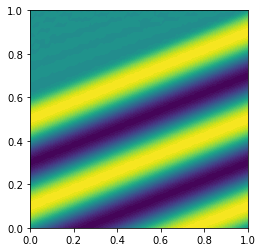

In [1]:
""" Steady state advection-diffusion equation,
discontinuous formulation using full upwinding.

Implemented in python from cpp demo by Johan Hake.
"""

from dolfin import *
import matplotlib.pyplot as plt


# FIXME: Make mesh ghosted
parameters["ghost_mode"] = "shared_facet"

class DirichletBoundary (SubDomain):
    def inside (self, x, on_boundary):
        return abs(x[0] - 1.0) < DOLFIN_EPS and on_boundary

# Load mesh
mesh = UnitSquareMesh (40, 40)

# Defining the function spaces
V_dg = FunctionSpace (mesh, "DG", 1)
V_cg = FunctionSpace (mesh, "CG", 1)
V_u  = VectorFunctionSpace (mesh, "CG", 2)

# Create velocity Function
# u = Constant((-1,-0.4))
u = interpolate ( Constant (("-1.", "-0.4")), V_u)

# Test and trial functions
v   = TestFunction (V_dg)
phi = TrialFunction (V_dg)

# Diffusivity
kappa = Constant (0.0)

# Source term
f = Constant (0.0)

# Penalty term
alpha = Constant (5.0)

# Mesh-related functions
n = FacetNormal (mesh)
h = CellDiameter (mesh)
h_avg = (h ('+') + h ('-'))/2

# ( dot(v, n) + |dot(v, n)| )/2.0
un = (dot (u, n) + abs (dot (u, n)))/2.0

# Bilinear form (advection-diffusion equation)
# a_int = dot(grad(v), kappa*grad(phi) - u*phi)*dx
# a_fac = kappa*(alpha/h('+'))*dot(jump(v, n), jump(phi, n))*dS \
#       - kappa*dot(avg(grad(v)), jump(phi, n))*dS \
#       - kappa*dot(jump(v, n), avg(grad(phi)))*dS
# a_vel = dot(jump(v), un('+')*phi('+') - un('-')*phi('-') )*dS  + dot(v, un*phi)*ds
# a = a_int + a_fac + a_vel

# Bilinear form (advection equation)
a_int = dot (grad (v), - u*phi)*dx
a_vel = dot (jump(v), un ('+')*phi ('+') - un ('-')*phi ('-') )*dS  + dot(v, un*phi)*ds
a = a_int + a_vel

# Linear form
L = v*f*dx

# Set up boundary condition (apply strong BCs)
g = Expression ("sin (pi*5.0*x[1])", degree = 2)
bc = DirichletBC (V_dg, g, DirichletBoundary (), "geometric")

# Solution function
phi_h = Function (V_dg)

# Assemble and apply boundary conditions
A = assemble (a)
b = assemble (L)
bc.apply (A, b)

# Solve system
solve (A, phi_h.vector (), b)

# Project solution to a continuous function space
up = project (phi_h, V = V_cg)

# Discontinuous function space
# up = phi_h

file = File ("temperature.pvd")
file << up

# Plot solution
plot (up)
plt.show ()

In [3]:
from dolfin import *
import matplotlib.pyplot as plt

# FIXME: Make mesh ghosted
parameters["ghost_mode"] = "shared_facet"

# Dirichlet boundary
class DirichletBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] < (DOLFIN_EPS + 1.0)and on_boundary
        
# Mesh
mesh = UnitIntervalMesh(50)

# Function spaces
V_dg = FunctionSpace(mesh, "DG", 1)
V_cg = FunctionSpace(mesh, "CG", 1)
V_u  = FunctionSpace(mesh, "CG", 2) 

# Velocity 
u_const = Constant(0.5)
u = interpolate(u_const, V_u)

# Test and trial functions
v   = TestFunction(V_dg)
phi = TrialFunction(V_dg)

# Source term
f = Constant(0.0)

# Penalty term
alpha = Constant(5.0)

# Mesh-related functions
n = FacetNormal(mesh)
h = CellDiameter(mesh)
h_avg = (h('+') + h('-'))/2

# Upwind 
uv = as_vector ((u, ))
un = (dot (uv, n) - abs (dot (uv, n)) )/2

# Bilinear form (advection equation)
a_int = inner (Dx (v, 0), - u*phi)*dx
a_vel = dot (jump(v), un ('+')*phi ('+') - un ('-')*phi ('-') )*dS  + dot (v, un*phi)*ds
a = a_int + a_vel

# Linear form
L = v*f*dx

# Set up boundary condition (apply strong BCs)
g = Expression ("sin(pi*5.0*x[1])", degree=2)
bc = DirichletBC (V_dg, g, DirichletBoundary(), "geometric")

# Solution function
phi_h = Function(V_dg)


solve(a == L, phi_h)

print("Solution vector norm (0): {!r}".format(phi_h.vector().norm("l2")))

# # Assemble and apply boundary conditions
# A = assemble(a)
# b = assemble(L)
# bc.apply(A, b)

# # Mark facets of the mesh

# boundaries = MeshFunction('size_t', mesh, 0)
# DirichletBoundary().mark(boundaries, 1)

# bc = DirichletBC (V_dg, g, DirichletBoundary (), "geometric")

# # Solution function
# phi_h = Function (V_dg)

# # Assemble and apply boundary conditions
# A = assemble (a)
# b = assemble (L)
# bc.apply (A, b)

Solution vector norm (0): 0.0


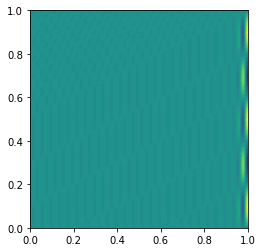

In [3]:

from dolfin import *
import matplotlib.pyplot as plt

# FIXME: Make mesh ghosted
parameters["ghost_mode"] = "shared_facet"

class DirichletBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - 1.0) < DOLFIN_EPS and on_boundary

# Load mesh
mesh = UnitSquareMesh(50,50)

# Defining the function spaces
V_dg = FunctionSpace(mesh, "DG", 1)
V_cg = FunctionSpace(mesh, "CG", 1)
V_u  = VectorFunctionSpace(mesh, "CG", 2)

# Create velocity Function
u = Constant((3,3))

# Test and trial functions
v   = TestFunction(V_dg)
phi = TrialFunction(V_dg)

# Diffusivity
kappa = Constant(0.0)

# Source term
f = Constant(0.0)

# Penalty term
alpha = Constant(5.0)

# Mesh-related functions
n = FacetNormal(mesh)
h = CellDiameter(mesh)
h_avg = (h('+') + h('-'))/2

# ( dot(v, n) + |dot(v, n)| )/2.0
un = (dot(u, n) + abs(dot(u, n)))/2.0

# Bilinear form
a_int = dot(grad(v), kappa*grad(phi) - u*phi)*dx

a_fac = kappa*(alpha/h('+'))*dot(jump(v, n), jump(phi, n))*dS \
      - kappa*dot(avg(grad(v)), jump(phi, n))*dS \
      - kappa*dot(jump(v, n), avg(grad(phi)))*dS

a_vel = dot(jump(v), un('+')*phi('+') - un('-')*phi('-') )*dS  + dot(v, un*phi)*ds

a = a_int + a_fac + a_vel

# Linear form
L = v*f*dx

# Set up boundary condition (apply strong BCs)
g = Expression("sin(pi*5.0*x[1])", degree=2)
bc = DirichletBC(V_dg, g, DirichletBoundary(), "geometric")

# Solution function
phi = Function(V_dg)

# Assemble and apply boundary conditions
A = assemble(a)
b = assemble(L)
bc.apply(A, b)

# Solve system
solve(A, phi.vector(), b)

# Project solution to a continuous function space
up = project(phi, V=V_cg)

file = File("temperature.pvd")
file << up

# Plot solution
plot(up)
plt.show()


In [4]:

from dolfin import *
import matplotlib.pyplot as plt

# FIXME: Make mesh ghosted
parameters["ghost_mode"] = "shared_facet"

class DirichletBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - 1.0) < DOLFIN_EPS and on_boundary

# Load mesh
mesh = UnitSquareMesh(50,50)

# Defining the function spaces
V_dg = FunctionSpace(mesh, "DG", 1)
V_cg = FunctionSpace(mesh, "CG", 1)
V_u  = VectorFunctionSpace(mesh, "CG", 2)

# Create velocity Function
u = Constant((3,3))

# Test and trial functions
v   = TestFunction(V_dg)
dphi = TrialFunction(V_dg)

# Solution function
phi = Function(V_dg)

# Diffusivity
kappa = Constant(0.0)

# Source term
f = Constant(0.0)

# Penalty term
alpha = Constant(5.0)

# Mesh-related functions
n = FacetNormal(mesh)
h = CellDiameter(mesh)
h_avg = (h('+') + h('-'))/2

# ( dot(v, n) + |dot(v, n)| )/2.0
un = (dot(u, n) + abs(dot(u, n)))/2.0

# Bilinear form
a_int = dot(grad(v), kappa*grad(phi) - u*phi)*dx

a_fac = kappa*(alpha/h('+'))*dot(jump(v, n), jump(phi, n))*dS \
      - kappa*dot(avg(grad(v)), jump(phi, n))*dS \
      - kappa*dot(jump(v, n), avg(grad(phi)))*dS

a_vel = dot(jump(v), un('+')*phi('+') - un('-')*phi('-') )*dS  + dot(v, un*phi)*ds

a = a_int + a_fac + a_vel

# Linear form
L = v*f*dx

# Set up boundary condition (apply strong BCs)
g = Expression("sin(pi*5.0*x[1])", degree=2)
bc = DirichletBC(V_dg, g, DirichletBoundary(), "geometric")

# Compute directional derivative about u in the direction of du (Jacobian)
dF = derivative (a - L, phi, dphi)

problem = NonlinearVariationalProblem (a - L, phi, bcs = bc, J = dF)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [ ]:




# Assemble and apply boundary conditions
A = assemble(a)
b = assemble(L)
bc.apply(A, b)

# Solve system
solve(A, phi.vector(), b)

# Project solution to a continuous function space
up = project(phi, V=V_cg)

file = File("temperature.pvd")
file << up

# Plot solution
plot(up)
plt.show()


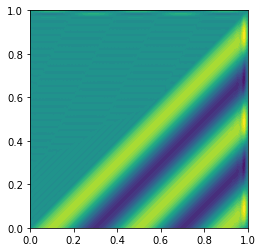

Solution vector norm (0): 32.65111462451826


In [5]:
""" Steady state advection-diffusion equation,
discontinuous formulation using full upwinding.

Implemented in python from cpp demo by Johan Hake.
"""

from dolfin import *
import matplotlib.pyplot as plt

# FIXME: Make mesh ghosted
parameters["ghost_mode"] = "shared_facet"

class DirichletBoundary_right (SubDomain):
    def inside(self, x, on_boundary):
        return x[0] < (1.0 + DOLFIN_EPS) and on_boundary

class DirichletBoundary_left (SubDomain):
    def inside(self, x, on_boundary):
        return x[0] < DOLFIN_EPS and on_boundary

# Load mesh
mesh = UnitSquareMesh (64, 64)

# Defining the function spaces
V_dg = FunctionSpace(mesh, "DG", 1)
V_cg = FunctionSpace(mesh, "CG", 1)
V_u  = VectorFunctionSpace(mesh, "CG", 1)

# Create velocity Function
u_const = Constant((1, 1))
u = interpolate(u_const, V_u)

# Test and trial functions
v   = TestFunction(V_dg)
phi = TrialFunction(V_dg)

# Diffusivity
kappa = Constant(0.0)

# Source term
f = Constant(0.0)

# Penalty term
alpha = Constant(5.0)

# Mesh-related functions
n = FacetNormal(mesh)
h = CellDiameter(mesh)
h_avg = (h('+') + h('-'))/2

# ( dot(v, n) + |dot(v, n)| )/2.0
un = (dot(u, n) + abs(dot(u, n)))/2.0

# Bilinear form
a_int = dot(grad(v), kappa*grad(phi) - u*phi)*dx

a_fac = kappa*(alpha/h('+'))*dot(jump(v, n), jump(phi, n))*dS \
      - kappa*dot(avg(grad(v)), jump(phi, n))*dS \
      - kappa*dot(jump(v, n), avg(grad(phi)))*dS

a_vel = dot(jump(v), un('+')*phi('+') - un('-')*phi('-') )*dS  + dot(v, un*phi)*ds

a = a_int + a_fac + a_vel

# Linear form
L = v*f*dx

# Set up boundary condition (apply strong BCs)
g_right = Expression("sin(pi*5.0*x[0])", degree=2)
g_left = Expression("sin(pi*5.0*x[0])", degree=2)

bc = DirichletBC(V_dg, g_right, DirichletBoundary_right(), "geometric")

# Solution function
phi_h = Function(V_dg)

# Assemble and apply boundary conditions
A = assemble(a)
b = assemble(L)
bc.apply(A, b)

# Solve system
solve(A, phi_h.vector(), b)

# Project solution to a continuous function space
up = project(phi_h, V=V_cg)

file = File("temperature.pvd")
file << up

# Plot solution
plot(up)
plt.show()

print("Solution vector norm (0): {!r}".format(phi_h.vector().norm("l2")))

In [1]:
""" Steady state advection-diffusion equation,
discontinuous formulation using full upwinding.

Implemented in python from cpp demo by Johan Hake.
"""

from dolfin import *
import matplotlib.pyplot as plt

# FIXME: Make mesh ghosted
parameters ["ghost_mode"] = "shared_facet"

class DirichletBoundary_right (SubDomain):
    def inside (self, x, on_boundary):
        return x [0] < (1.0 + DOLFIN_EPS) and on_boundary

class DirichletBoundary_left (SubDomain):
    def inside (self, x, on_boundary):
        return x [0] < DOLFIN_EPS and on_boundary

# Load mesh
mesh = UnitSquareMesh (64, 64)

# Defining the function spaces
V_dg = FunctionSpace (mesh, "DG", 1)
V_cg = FunctionSpace (mesh, "CG", 1)
V_u  = VectorFunctionSpace (mesh, "CG", 1)

# Create velocity Function
u_const = Constant ((1, 1))
u = interpolate (u_const, V_u)

# Test and trial functions
v = TestFunction (V_dg)
dphi = TrialFunction (V_dg)
phi = Function (V_dg)

# Diffusivity
# kappa = Constant(0.0) #*activate for diffusion

# Source term
f = Constant (0.0)

# Penalty term
alpha = Constant (5.0)

# Mesh-related functions
n = FacetNormal (mesh)
h = CellDiameter (mesh)
h_avg = (h ('+') + h ('-'))/2

# Set up boundary condition (apply strong BCs)
g_right = Expression ("sin(pi*5.0*x [0])", degree = 2)
g_left = Expression ("sin(pi*5.0*x [0])", degree = 2)
bc = DirichletBC (V_dg, g_right, DirichletBoundary_right (), "geometric")

# ( dot(v, n) + |dot(v, n)| )/2.0
# un = (dot (u, n) + abs (dot (u, n)))/2.0 # Full upwinding

dot(grad(v),  u*phi)*dx

a = dot(grad(v), u*phi)*dx\
    - dot (avg (grad (v)), jump (phi, n))*dS \ 
    - dot (jump(v, n), avg (grad (phi)))*dS \
    + (alpha/h_avg)*dot (jump (v, n), jump (phi, n))*dS \
L = v*f*dx /
    - u0*dot (grad(v), n)*ds /
    + (gamma/h)*u0*v*ds

R = a - L

# Compute directional derivative about u in the direction of du (Jacobian)
dF = derivative (R, phi, dphi)
# Define transient solver function
problem = NonlinearVariationalProblem (R, phi, bcs = bc, J = dF)#, form_compiler_parameters = ffc_options)
transientsolver = NonlinearVariationalSolver (problem)
# Nonlinear solver
transientsolver.solve ()  

# Project solution to a continuous function space
up = project (phi, V = V_cg)

file = File ("temperature.pvd")
file << up

# Plot solution
plot (up)
plt.show ()

print ("Solution vector norm (0): {!r}".format (up.vector ().norm ("l2")))

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to solve nonlinear system with NewtonSolver.
*** Reason:  Newton solver did not converge because maximum number of iterations reached.
*** Where:   This error was encountered inside NewtonSolver.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------
